# **Class Assignment: Project Jumpstart - Exploratory Data Analysis (20 points)**

#### **SAI TEJASRI YERRAMSETTI**


---
**Instructions**: Complete the in-class assignment below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- Your completed assignment must be submitted to Canvas as a .ipynb file by the deadline listed on Canvas
---

<br>

The course project deadline is fast upon us! The tasks below are designed to get you started.

<br>


####<font color=red>Task 1</font>


<ol>
    <li> In a single paragraph, describe the desired data analysis on the project dataset for your course project. Please include </li>
    <ul>
         <li> A background sentence that motivates your analysis </li>
         <li> A description of the questions you would like to answer </li>
         <li> A description of the data you will be using (i.e. response variables, predictor variables, etc.) </li><br>
    </ul>
    <li> Load the project dataset and display the first 6 lines </li>
       
</ol>

# "Investigating Emphysema Severity in COPD: A Regression Approach"

In this course project, we aim to conduct a comprehensive analysis of a Chronic Obstructive Pulmonary Disease (COPD) dataset available at https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data.csv. The motivation behind this analysis stems from the increasing prevalence of COPD globally and the need for insights that can enhance our understanding of the disease and inform potential interventions. The dataset likely contains information on various aspects of COPD, and our primary questions include identifying key risk factors, assessing the impact of specific variables on disease progression, and exploring potential associations between patient demographics and treatment outcomes. The dataset likely includes variables such as age, gender, smoking history, lung function measures, and potentially treatment regimens or interventions. To initiate this analysis, we will load the dataset and display the first 6 lines to gain a preliminary understanding of its structure and content.

In [ ]:
copd <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data.csv")

Head - First 6 lines of dataset

In [ ]:
head(copd)

sid    visit_year visit_date visit_age gender race  height_cm weight_kg sysBP
1 10005Q 2008       1/15/2008  54.5      Female White 159.9      73.0     130  
2 10006S 2008       1/15/2008  62.3      Female White 162.6      86.0     170  
3 10010J 2008       1/15/2008  65.9      Female White 162.1      62.8      96  
4 10015T 2008       2/15/2008  59.6      Male   White 182.9     110.0     142  
5 10017X 2008       6/15/2008  67.5      Male   White 179.1      83.0     106  
6 10022Q 2008       2/15/2008  69.8      Female White 158.8      78.0     122  
  diasBP ⋯ total_lung_capacity pct_emphysema functional_residual_capacity
1 80     ⋯ 5.6636               0.926851      2.4766                     
2 80     ⋯ 5.2325              14.005900     -1.0000                     
3 63     ⋯ 5.1960               1.683760      3.8993                     
4 88     ⋯ 6.3971               9.330450     -1.0000                     
5 72     ⋯ 7.8935              36.262400      4.1043                     
6 78     ⋯ 5.1016              30.484400     -1.0000                     
  pct_gastrapping insp_meanatt exp_meanatt FEV1_FVC_ratio FEV1  FVC  
1  6.80077        -830.343     -650.526    0.77           2.921 3.805
2 -1.00000        -841.880       -1.000    0.43           1.288 3.022
3 41.34930        -833.429     -789.595    0.53           1.008 1.909
4 -1.00000        -841.315       -1.000    0.51           1.906 3.732
5 46.17690        -887.947     -792.397    0.57           2.748 4.827
6 -1.00000        -865.608       -1.000    0.53           1.076 2.047
  FEV1_phase2
1 2.622      
2 1.318      
3 1.087      
4 2.002      
5 2.178      
6 0.924

Install necessary packages (may take a few minutes)

In [ ]:
install.packages("car")          # for added variable plots, vif, etc.
install.packages("GGally")       # for pairs plot
install.packages("mice")         # includes functions for multiple imputation
install.packages("ggmice")       # visualizations for missing data
install.packages("reshape2")     # for converting wide to long format
install.packages("leaps")        # for model selection
install.packages("olsrr")        # Package to assess influential observations
install.packages("multcomp")     # for contrasts and multiple comparisons
install.packages("lmtest")       # for breusch-pagan test
install.packages("glmnet")       # for lasso, ridge, and elastic nets
install.packages("dplyr")        #provides a set of functions for data manipulation operations such as filtering rows, selecting columns, reordering rows, and adding new columns with ease and intuitiveness.
install.packages("gridExtra")    # for plot visualiztions in grid


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



LOAD PACKAGES

In [ ]:
install.packages("corrplot")
library(car)
library(ggplot2)
library(GGally)
library(mice)
library(ggmice)
library(reshape2)
library(leaps)
library(olsrr)
library(multcomp)
library(lmtest)
library(glmnet)
library(corrplot)
library(dplyr)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




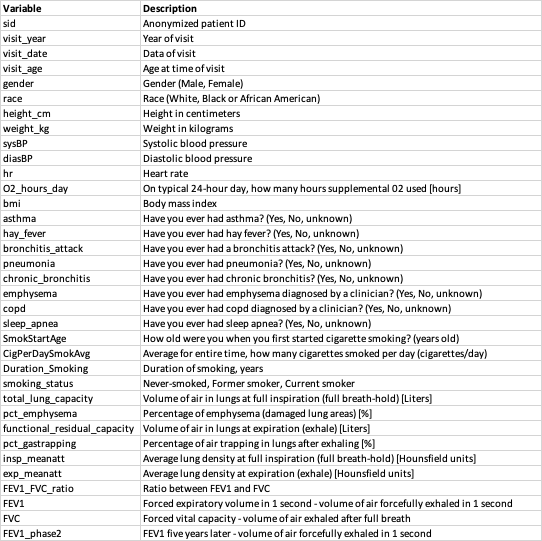

Column Names of COPD dataset

In [ ]:
names(copd)

[1] "sid"                          "visit_year"                  
 [3] "visit_date"                   "visit_age"                   
 [5] "gender"                       "race"                        
 [7] "height_cm"                    "weight_kg"                   
 [9] "sysBP"                        "diasBP"                      
[11] "hr"                           "O2_hours_day"                
[13] "bmi"                          "asthma"                      
[15] "hay_fever"                    "bronchitis_attack"           
[17] "pneumonia"                    "chronic_bronchitis"          
[19] "emphysema"                    "copd"                        
[21] "sleep_apnea"                  "SmokStartAge"                
[23] "CigPerDaySmokAvg"             "Duration_Smoking"            
[25] "smoking_status"               "total_lung_capacity"         
[27] "pct_emphysema"                "functional_residual_capacity"
[29] "pct_gastrapping"              "insp_meanatt"                
[31] "exp_meanatt"                  "FEV1_FVC_ratio"              
[33] "FEV1"                         "FVC"                         
[35] "FEV1_phase2"

DImensions of Dstaset

In [ ]:
dim(copd)

[1] 5747   35

####<font color=red>Task 2</font>

Start your exploratory analysis, which includes

* Understanding the structure of you dataset
* Identifying missing data
* Plotting appropriate visualizations to explore relationships between your response and prospective predictors
* Describing your observations, including functional relationships

This task is designed to give you a sense of how you want to build your regression model.

SUMMARY OF THE DATASET

In [ ]:
summary(copd)

     sid              visit_year    visit_date          visit_age    
 Length:5747        Min.   :2008   Length:5747        Min.   :39.00  
 Class :character   1st Qu.:2009   Class :character   1st Qu.:52.60  
 Mode  :character   Median :2009   Mode  :character   Median :59.50  
                    Mean   :2009                      Mean   :59.75  
                    3rd Qu.:2010                      3rd Qu.:66.30  
                    Max.   :2011                      Max.   :85.00  
    gender              race             height_cm       weight_kg     
 Length:5747        Length:5747        Min.   :133.7   Min.   : 34.90  
 Class :character   Class :character   1st Qu.:162.6   1st Qu.: 70.00  
 Mode  :character   Mode  :character   Median :170.0   Median : 82.00  
                                       Mean   :169.9   Mean   : 84.14  
                                       3rd Qu.:177.0   3rd Qu.: 95.30  
                                       Max.   :208.3   Max.   :176.40  
     s

In [ ]:
copd$gender <- factor(copd$gender)
copd$race <- factor(copd$race)
copd$asthma <- factor(copd$asthma, levels = c("Yes", "No", "Unknown"))
copd$hay_fever <- factor(copd$hay_fever, levels = c("Yes", "No", "Unknown"))
copd$bronchitis_attack <- factor(copd$bronchitis_attack, levels = c("Yes", "No", "Unknown"))
copd$pneumonia <- factor(copd$pneumonia, levels = c("Yes", "No", "Unknown"))
copd$chronic_bronchitis <- factor(copd$chronic_bronchitis, levels = c("Yes", "No", "Unknown"))
copd$emphysema <- factor(copd$emphysema, levels = c("Yes", "No", "Unknown"))
copd$copd <- factor(copd$copd, levels = c("Yes", "No", "Unknown"))
copd$sleep_apnea <- factor(copd$sleep_apnea, levels = c("Yes", "No", "Unknown"))
copd$smoking_status <- factor(copd$smoking_status)
str(copd)


'data.frame':	5747 obs. of  35 variables:
 $ sid                         : chr  "10005Q" "10006S" "10010J" "10015T" ...
 $ visit_year                  : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ visit_date                  : chr  "1/15/2008" "1/15/2008" "1/15/2008" "2/15/2008" ...
 $ visit_age                   : num  54.5 62.3 65.9 59.6 67.5 69.8 68.9 60.9 60.9 81 ...
 $ gender                      : Factor w/ 2 levels "Female","Male": 1 1 1 2 2 1 2 2 1 1 ...
 $ race                        : Factor w/ 2 levels "Black or African American",..: 2 2 2 2 2 2 1 2 2 2 ...
 $ height_cm                   : num  160 163 162 183 179 ...
 $ weight_kg                   : num  73 86 62.8 110 83 78 51 83.6 89.4 74 ...
 $ sysBP                       : int  130 170 96 142 106 122 120 124 156 116 ...
 $ diasBP                      : int  80 80 63 88 72 78 60 69 88 78 ...
 $ hr                          : int  87 81 66 75 72 87 88 71 81 59 ...
 $ O2_hours_day                : int  0 8

# Handling Missing Data

1. Checking for -1 values

In [ ]:
# Convert -1 values to NA in the entire dataset
copd[copd== -1] <- NA

# Optionally, if you want to convert specific columns, you can do it like this:
# cpod_data$variable_name[cpod_data$variable_name == -1] <- NA

# Verify the changes
summary(copd)

     sid              visit_year    visit_date          visit_age    
 Length:5747        Min.   :2008   Length:5747        Min.   :39.00  
 Class :character   1st Qu.:2009   Class :character   1st Qu.:52.60  
 Mode  :character   Median :2009   Mode  :character   Median :59.50  
                    Mean   :2009                      Mean   :59.75  
                    3rd Qu.:2010                      3rd Qu.:66.30  
                    Max.   :2011                      Max.   :85.00  
                                                                     
    gender                            race        height_cm    
 Female:2862   Black or African American:1737   Min.   :133.7  
 Male  :2885   White                    :4010   1st Qu.:162.6  
                                                Median :170.0  
                                                Mean   :169.9  
                                                3rd Qu.:177.0  
                                                Max.   :

From the above summary,
sysBP and diasBP have 2 missing values each.

hr has 1 missing value.

SmokStartAge, CigPerDaySmokAvg, and Duration_Smoking have 76, 76, and 79 missing values, respectively.

total_lung_capacity and pct_emphysema have 1045 missing values each.

functional_residual_capacity and insp_meanatt have 1650 missing values each.

FEV1_FVC_ratio, FEV1, FVC have 29 missing values each.


In [ ]:
missing_values_count <- colSums(is.na(copd))
print(missing_values_count)


                         sid                   visit_year 
                           0                            0 
                  visit_date                    visit_age 
                           0                            0 
                      gender                         race 
                           0                            0 
                   height_cm                    weight_kg 
                           0                            0 
                       sysBP                       diasBP 
                           2                            2 
                          hr                 O2_hours_day 
                           1                            0 
                         bmi                       asthma 
                           0                          380 
                   hay_fever            bronchitis_attack 
                        5747                          485 
                   pneumonia           chronic_bronchiti


```
Columns with 0 missing values:

sid
visit_year
visit_date
visit_age
gender
race
height_cm
weight_kg
bmi
asthma
hay_fever
bronchitis_attack
pneumonia
chronic_bronchitis
emphysema
copd
sleep_apnea
smoking_status
FEV1_phase2
Columns with a small number of missing values:

hr has 1 missing value.
O2_hours_day has 0 missing values.
sysBP and diasBP each have 2 missing values.
Columns with a significant number of missing values:

SmokStartAge has 76 missing values.
CigPerDaySmokAvg has 76 missing values.
Duration_Smoking has 79 missing values.
total_lung_capacity has 1045 missing values.
pct_emphysema has 1045 missing values.
functional_residual_capacity has 1650 missing values.
pct_gastrapping has 1650 missing values.
insp_meanatt has 1045 missing values.
exp_meanatt has 1650 missing values.
FEV1_FVC_ratio has 29 missing values.
```



2.Calculate the Percentage of Missing Data

In [ ]:
missing_percentage <- colSums(is.na(copd)) / nrow(copd) * 100
print(missing_percentage)


                         sid                   visit_year 
                  0.00000000                   0.00000000 
                  visit_date                    visit_age 
                  0.00000000                   0.00000000 
                      gender                         race 
                  0.00000000                   0.00000000 
                   height_cm                    weight_kg 
                  0.00000000                   0.00000000 
                       sysBP                       diasBP 
                  0.03480077                   0.03480077 
                          hr                 O2_hours_day 
                  0.01740038                   0.00000000 
                         bmi                       asthma 
                  0.00000000                   6.61214547 
                   hay_fever            bronchitis_attack 
                100.00000000                   8.43918566 
                   pneumonia           chronic_bronchiti

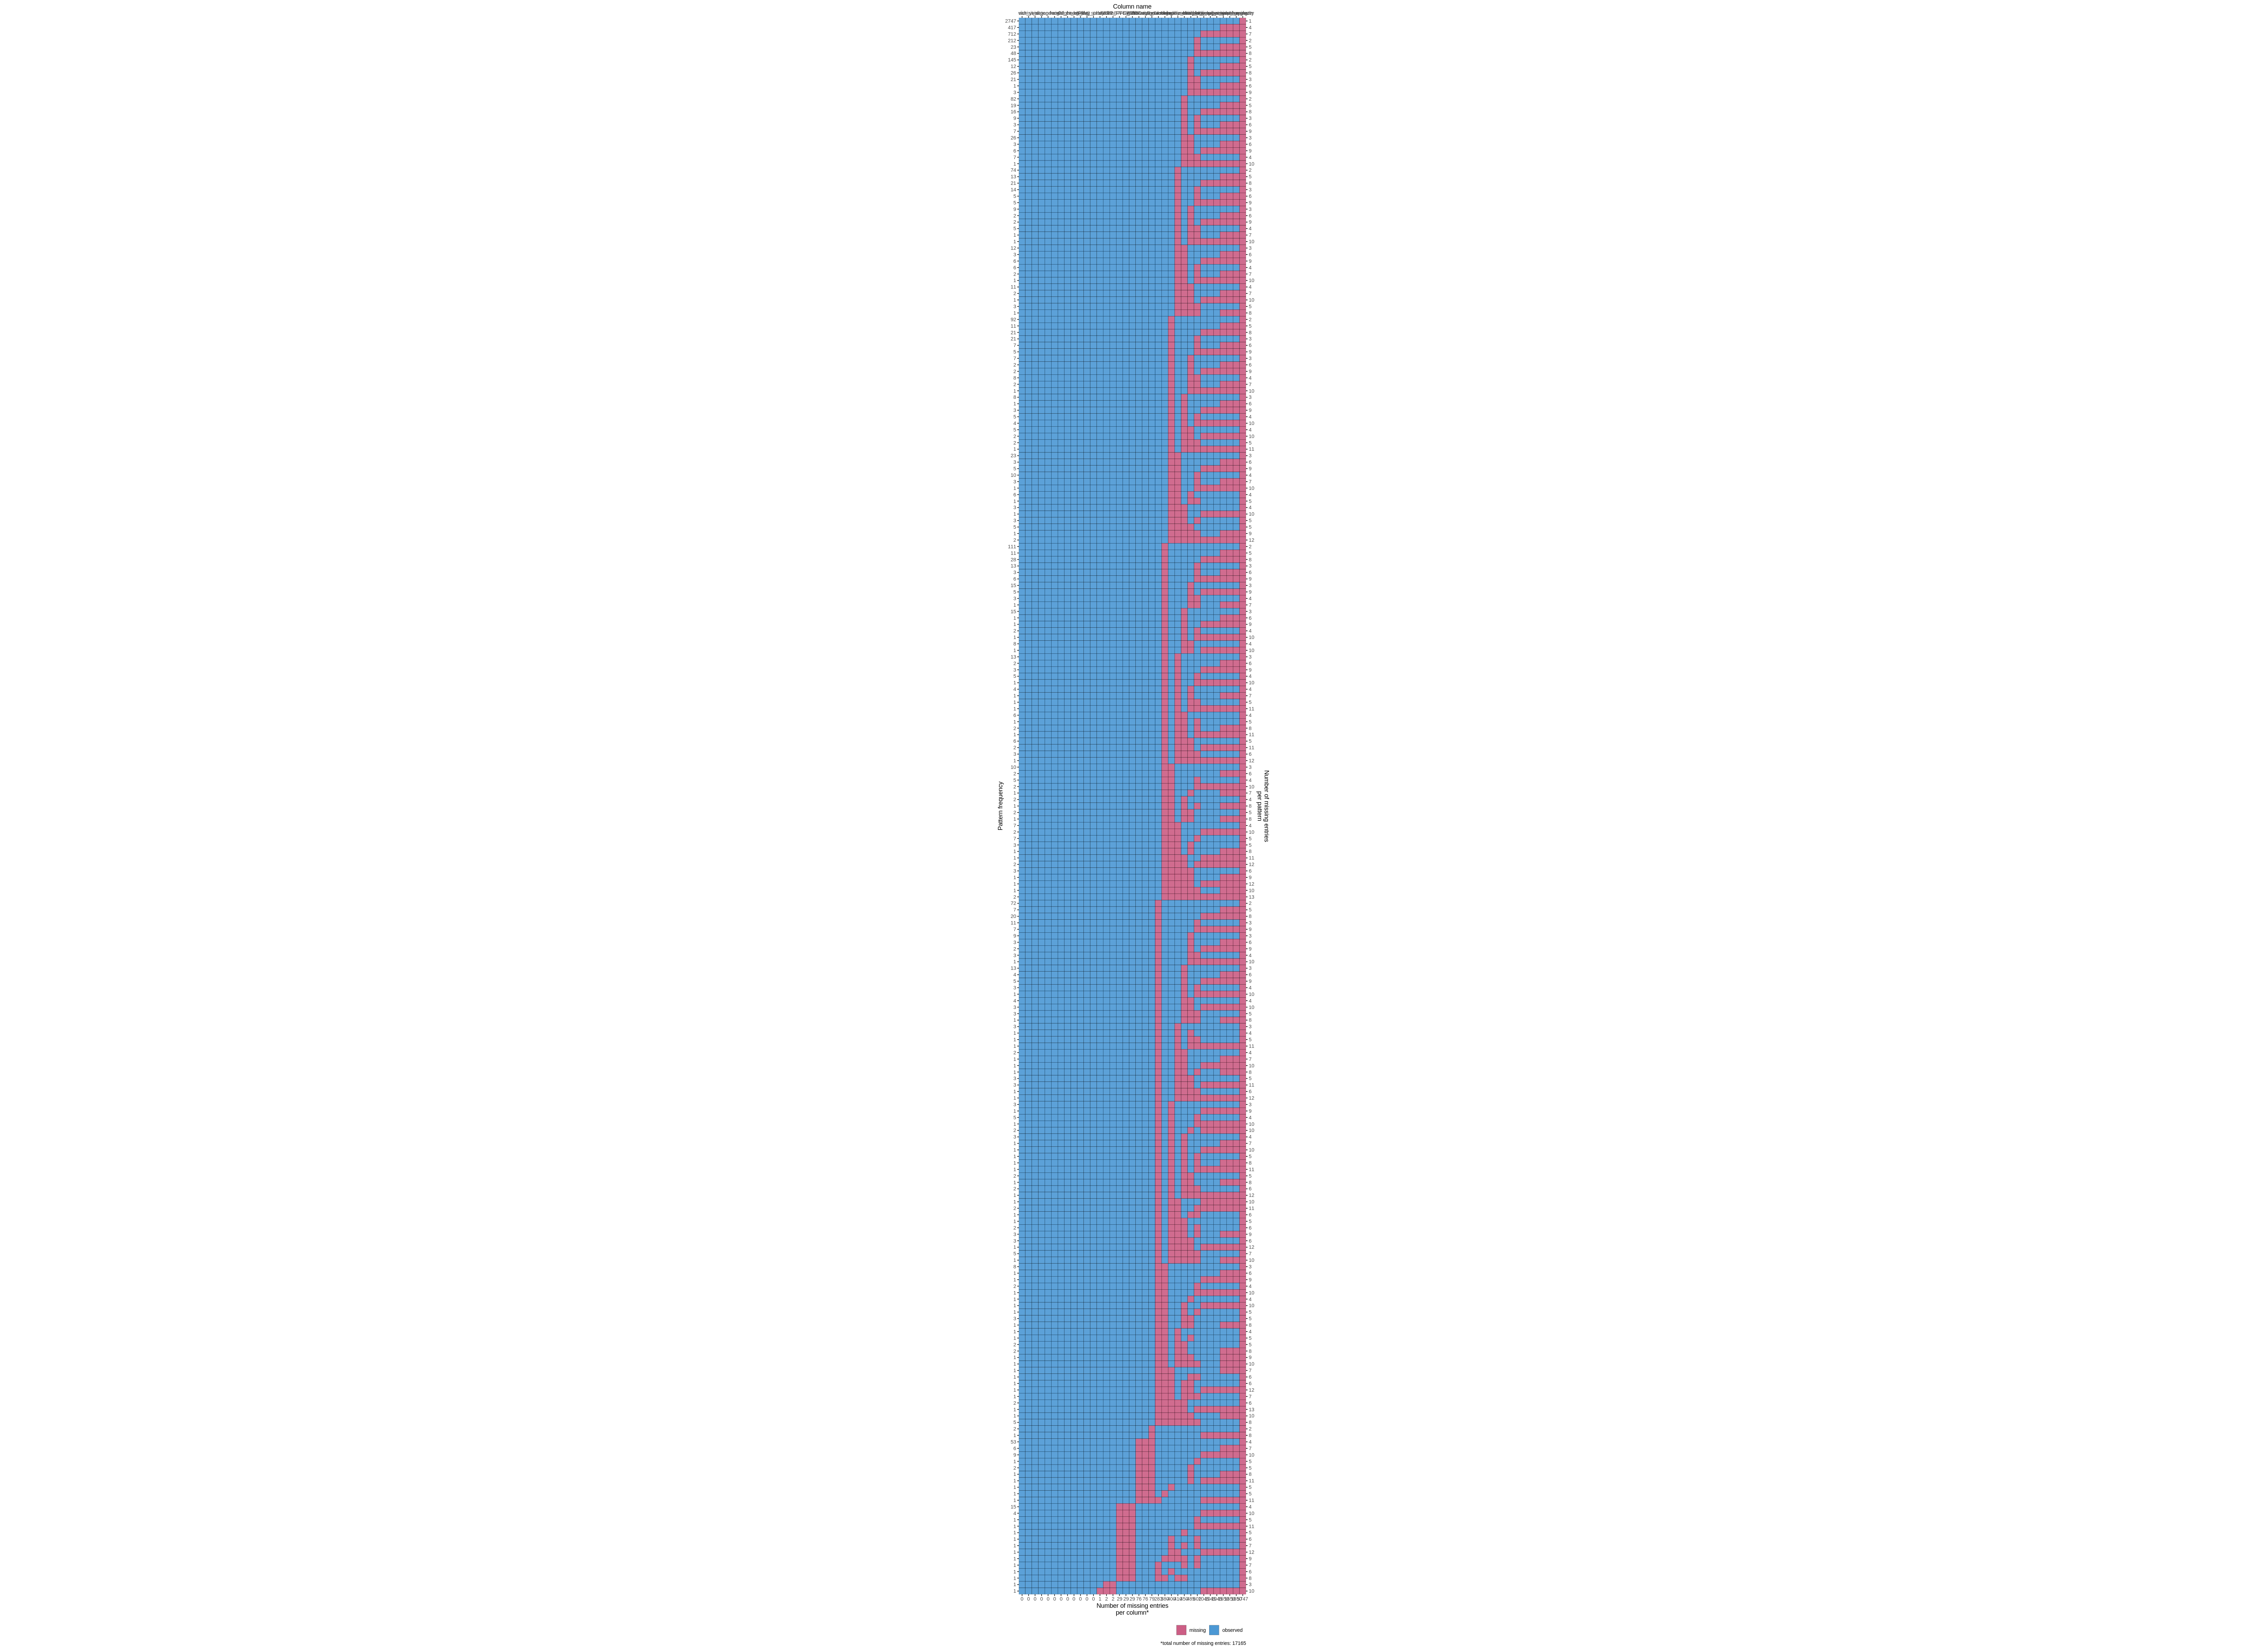

In [ ]:
options(repr.plot.width=55, repr.plot.height=40)
plot_pattern(copd)


3. Visualizing Missing Data

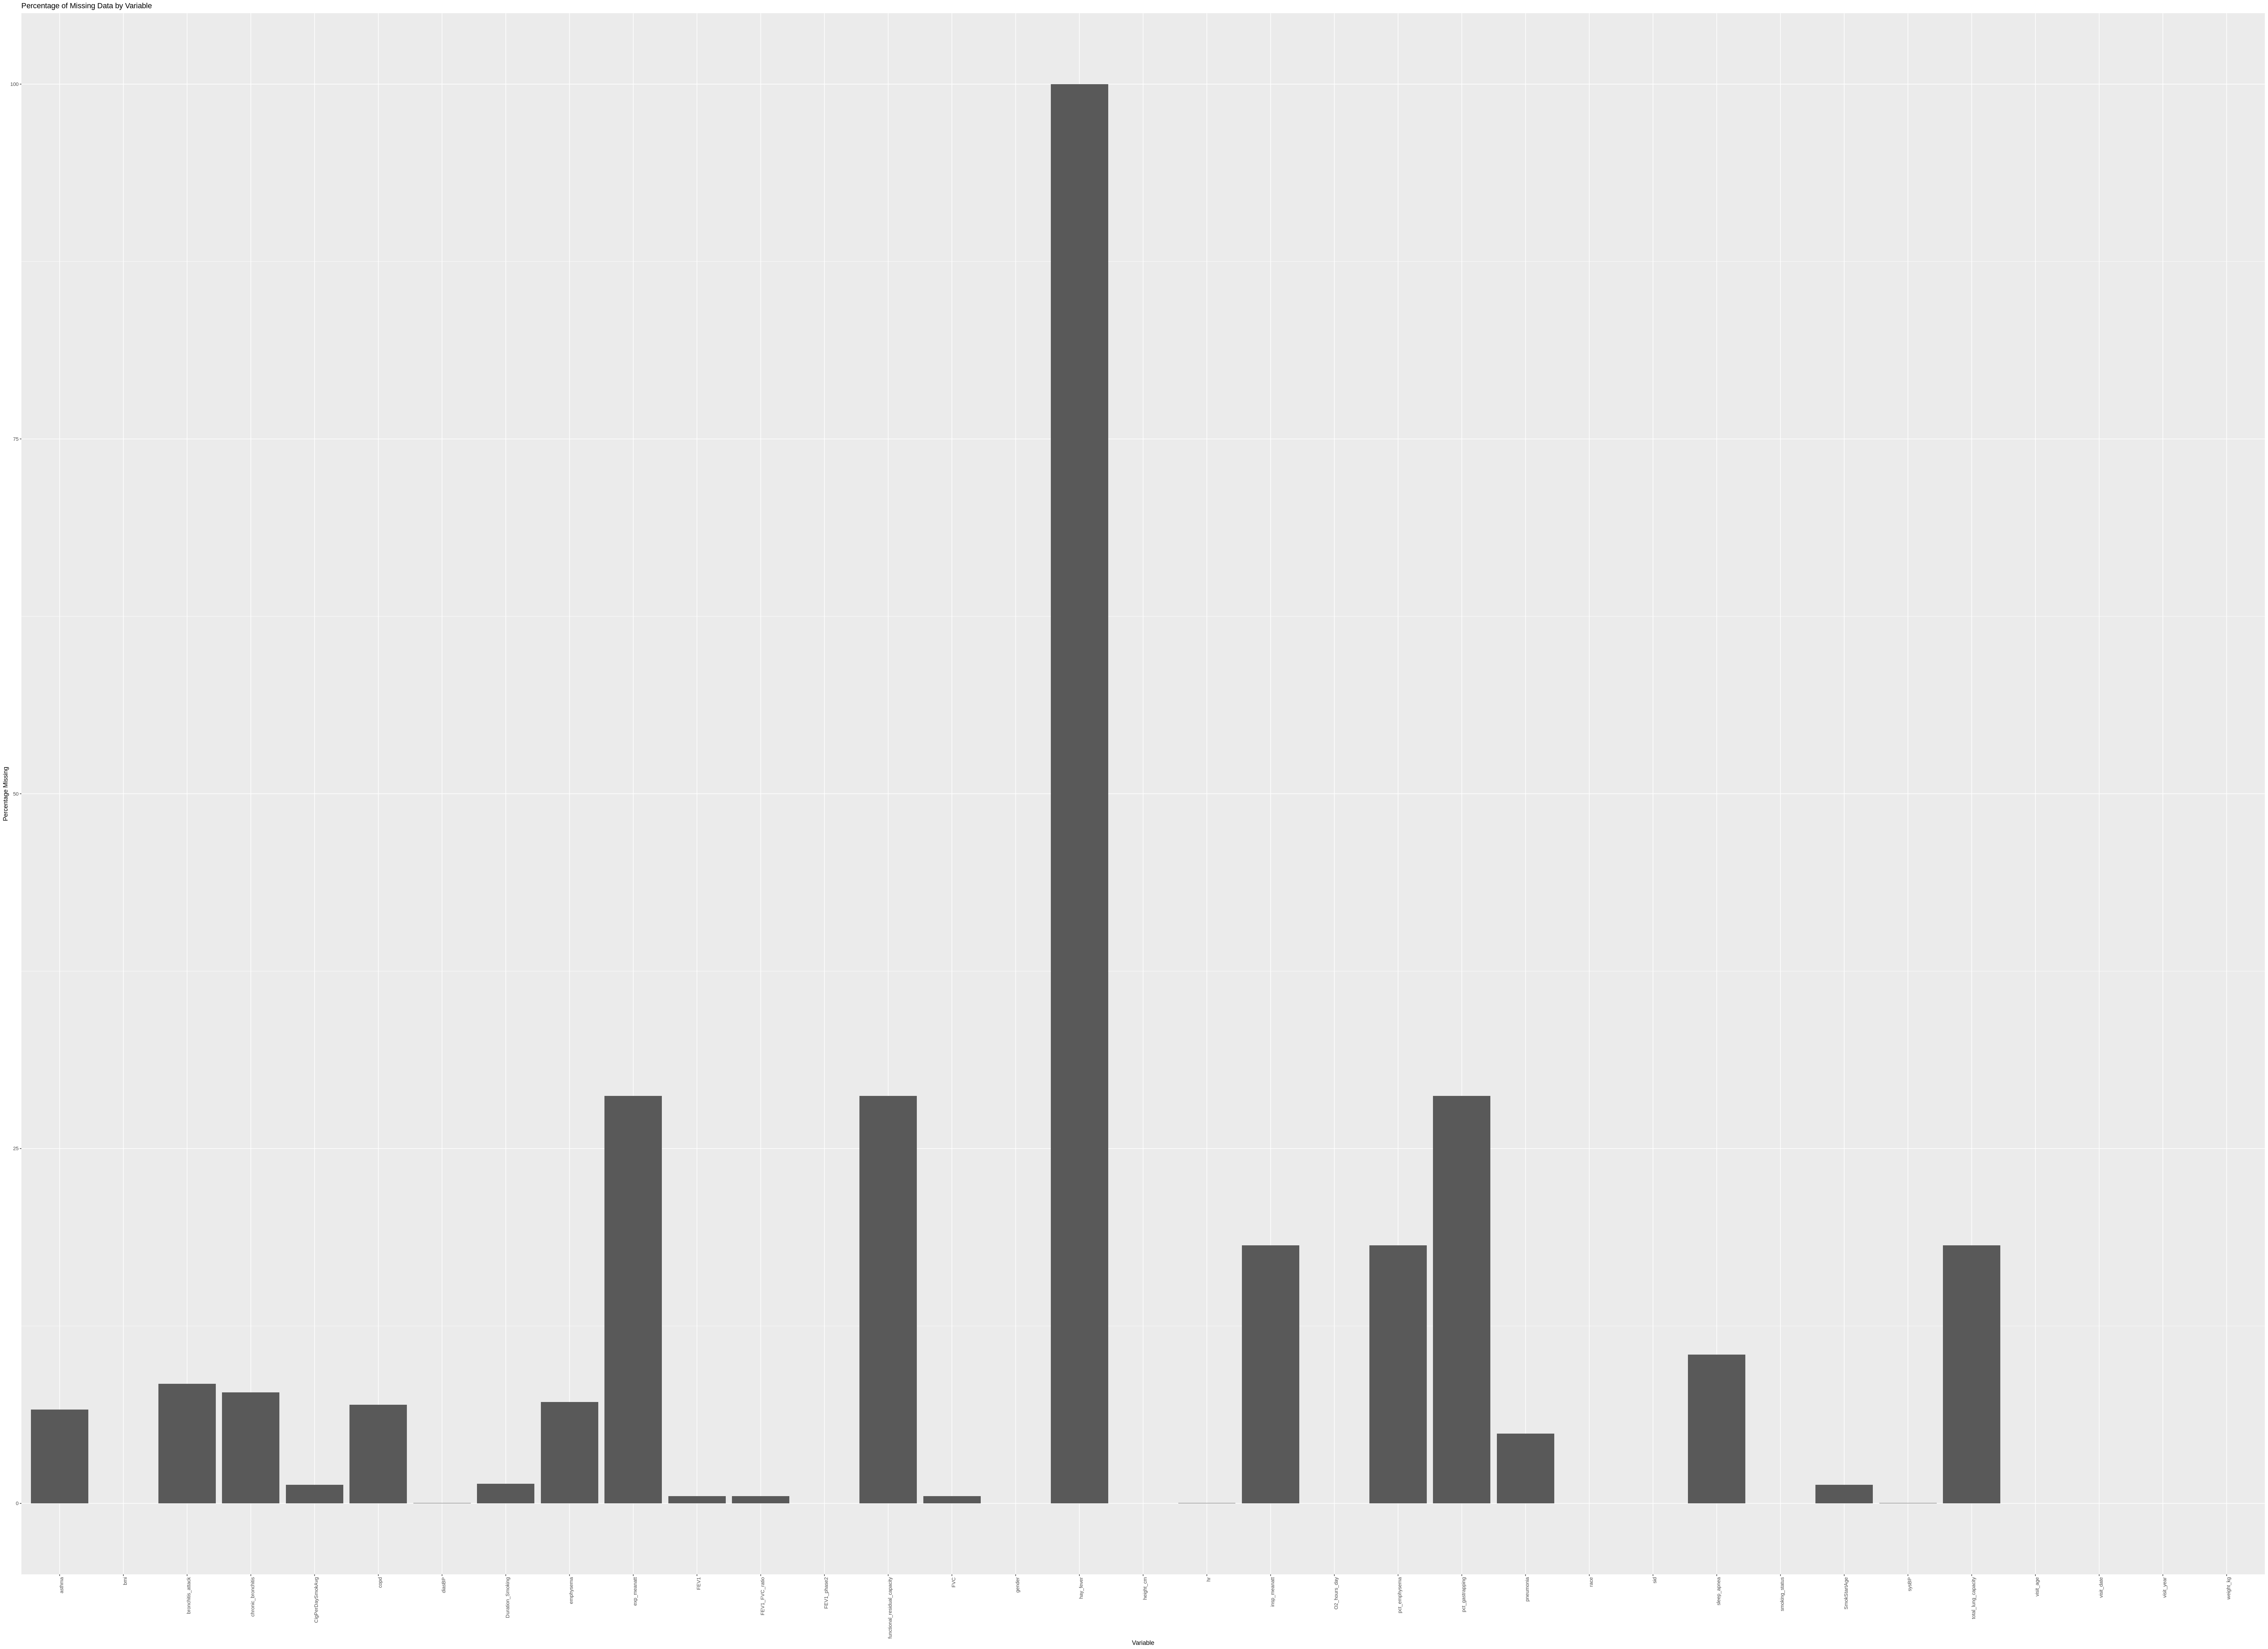

In [ ]:
# Create a dataframe for missing data visualization
missing_data_df <- data.frame(
    Variable = names(missing_percentage),
    Percentage = missing_percentage
)

# Create a bar plot
ggplot(missing_data_df, aes(x = Variable, y = Percentage)) +
    geom_bar(stat = "identity") +
    labs(title = "Percentage of Missing Data by Variable", x = "Variable", y = "Percentage Missing") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))


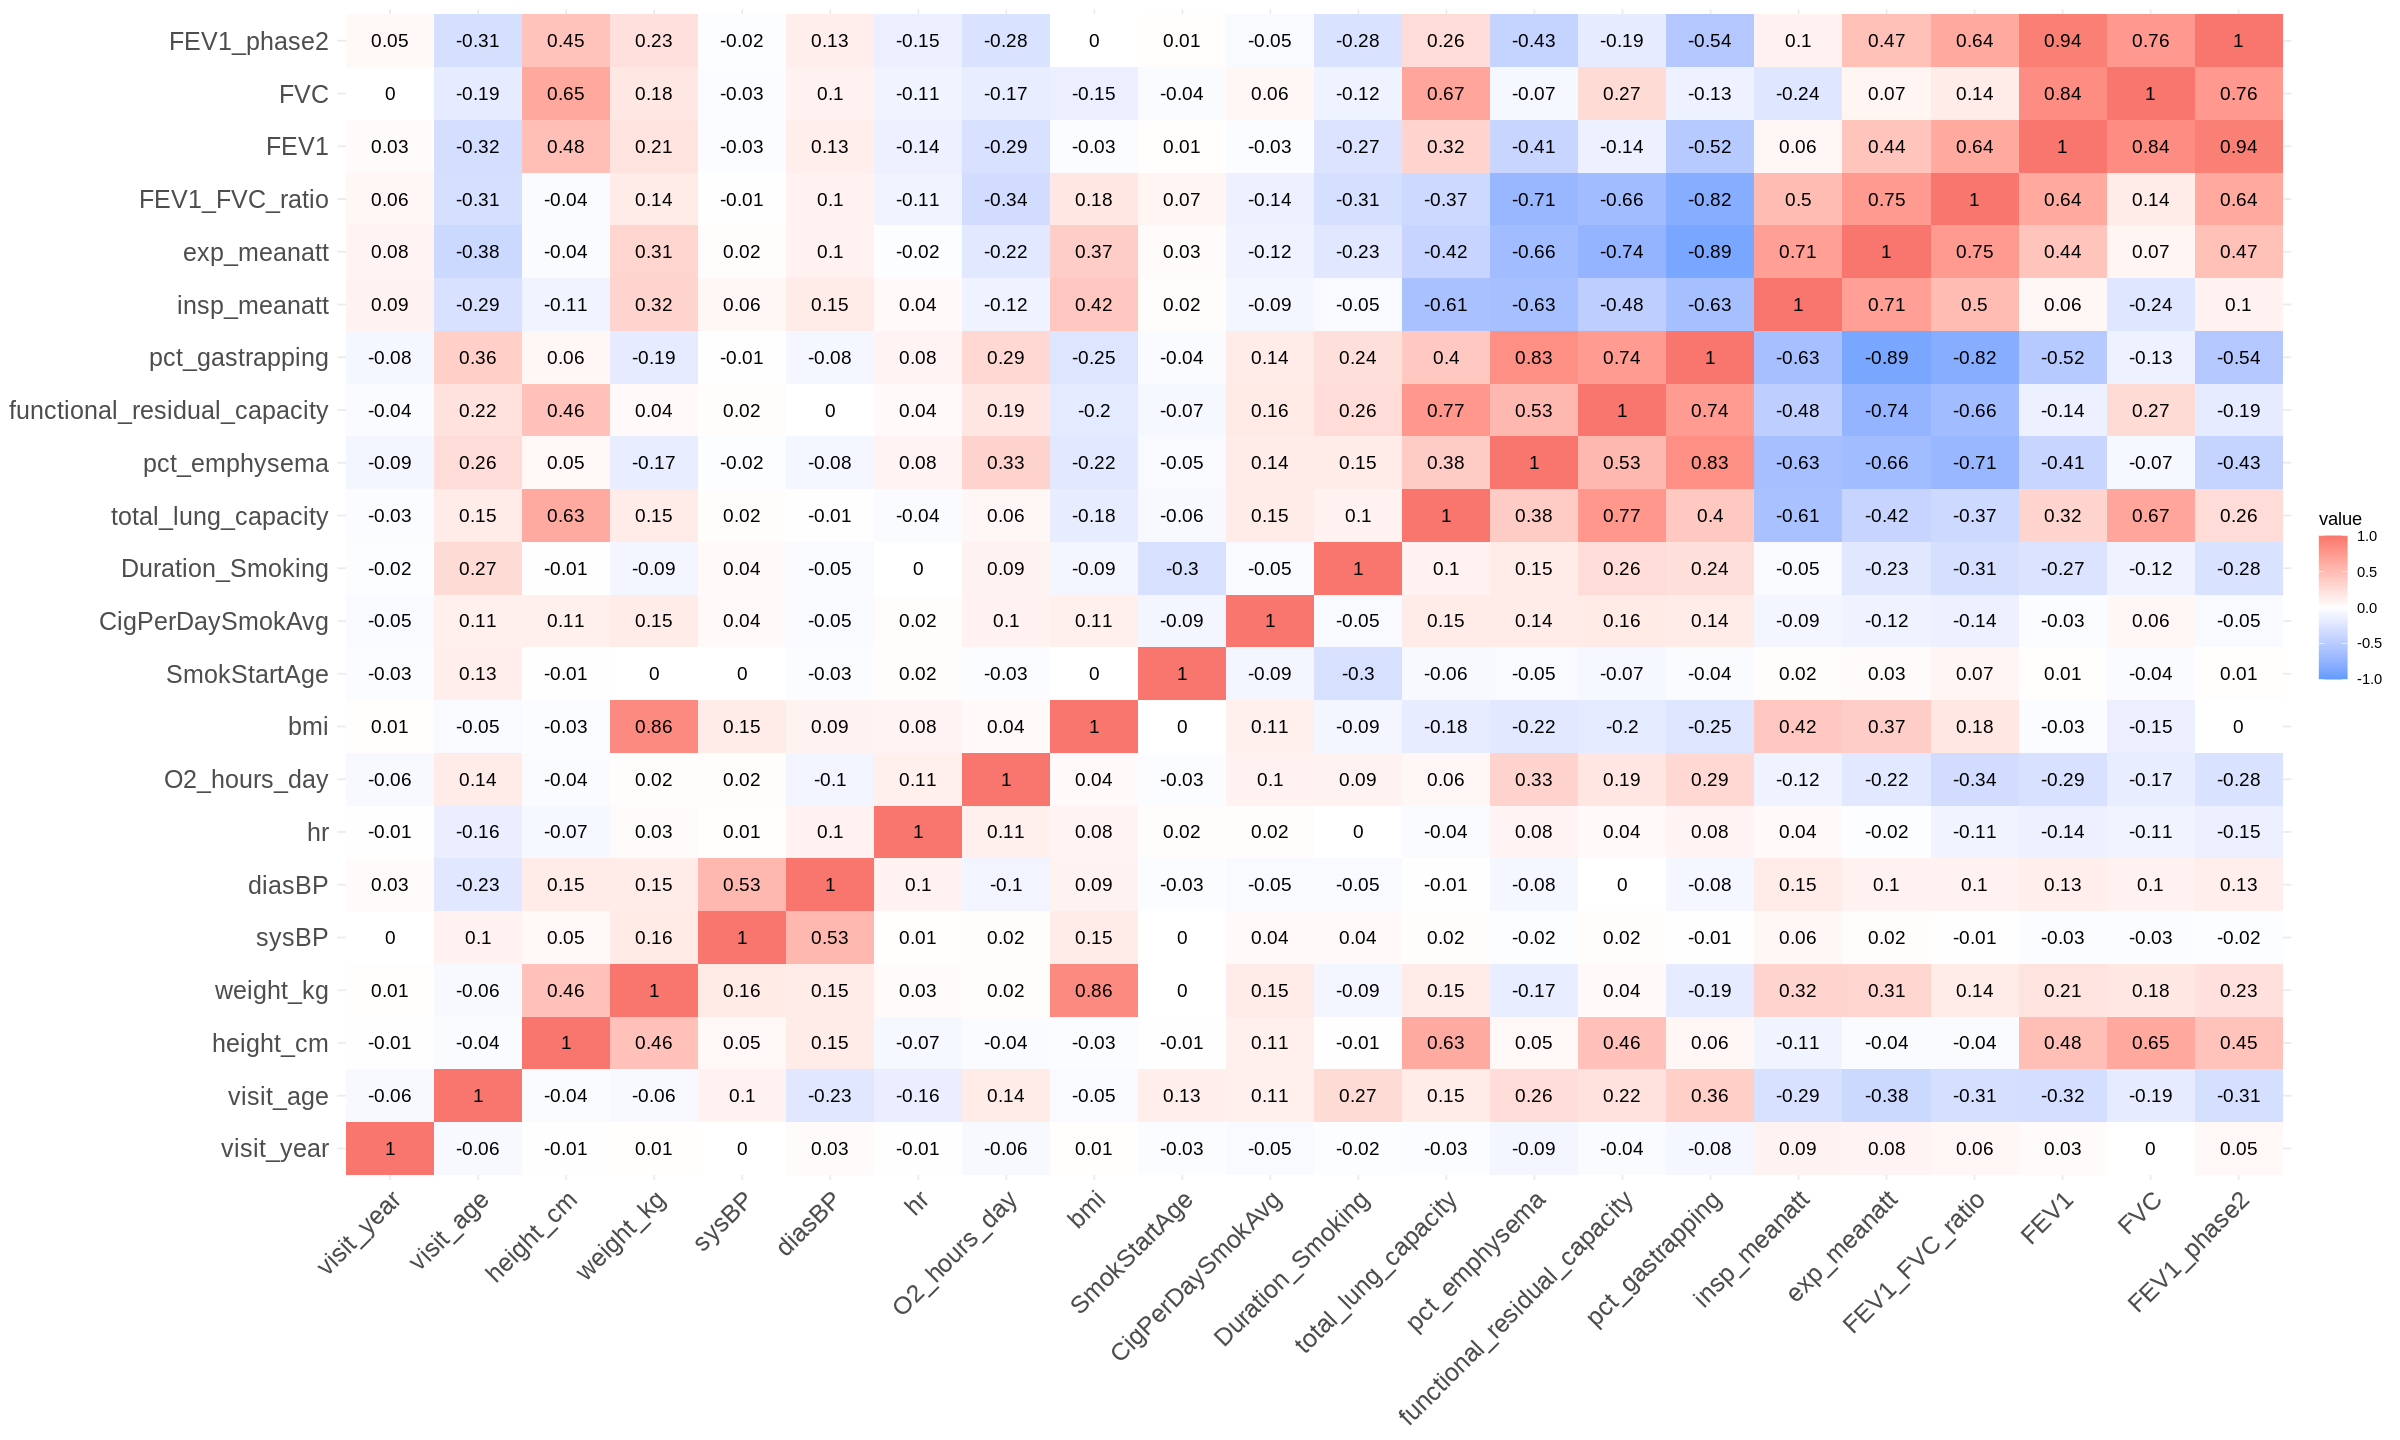

In [ ]:

options(repr.plot.width=20, repr.plot.height=12)

# Calculate the correlation matrix, exclude non-numeric columns as needed
# Here, I'm assuming columns 4 to the end are numeric
cor_matrix <- cor(copd[, sapply(copd, is.numeric)], use = "complete.obs")

# Melt the correlation matrix into a long format and round the values
copd_melt <- melt(round(cor_matrix, 2))

# Create the correlation plot with ggplot
ggplot(data = copd_melt, aes(x=Var1, y=Var2, fill=value)) +
  geom_tile() +
  geom_text(aes(Var2, Var1, label = value), color = "black", size = 4) +
  scale_fill_gradient2(low = "#619CFF",
                       mid = "white",
                       high = "#F8766D",
                       limits = c(-1, 1)) +
  theme_minimal() +  # or any other theme you prefer
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 15),
        axis.text.y = element_text(hjust = 1, size = 15),
        axis.title = element_blank())  # Hide axis titles if desired


From the above correlation plot, I can infer that pct_gastrapping, insp_meanatt, exp_meanatt, FVV1_FVC_ratio are highly correlated

In [ ]:
copd_imputed_data <- mice(copd, method = 'pmm', m = 5)
completed_data <- complete(copd_imputed_data, 1)


 iter imp variable
  1   1  sysBP  diasBP  hr  asthma  bronchitis_attack  pneumonia  chronic_bronchitis  emphysema  copd  sleep_apnea  SmokStartAge  CigPerDaySmokAvg  Duration_Smoking  total_lung_capacity  pct_emphysema  functional_residual_capacity  pct_gastrapping  insp_meanatt  exp_meanatt  FEV1_FVC_ratio  FEV1  FVC
  1   2  sysBP  diasBP  hr  asthma  bronchitis_attack  pneumonia  chronic_bronchitis  emphysema  copd  sleep_apnea  SmokStartAge  CigPerDaySmokAvg  Duration_Smoking  total_lung_capacity  pct_emphysema  functional_residual_capacity  pct_gastrapping  insp_meanatt  exp_meanatt  FEV1_FVC_ratio  FEV1  FVC
  1   3  sysBP  diasBP  hr  asthma  bronchitis_attack  pneumonia  chronic_bronchitis  emphysema  copd  sleep_apnea  SmokStartAge  CigPerDaySmokAvg  Duration_Smoking  total_lung_capacity  pct_emphysema  functional_residual_capacity  pct_gastrapping  insp_meanatt  exp_meanatt  FEV1_FVC_ratio  FEV1  FVC
  1   4  sysBP  diasBP  hr  asthma  bronchitis_attack  pneumonia  chronic_

Warning message:
“Number of logged events: 553”


In [ ]:
# List of original variable names
original_vars <- c("sysBP", "diasBP", "hr", "SmokStartAge",
                  "CigPerDaySmokAvg", "Duration_Smoking", "total_lung_capacity",
                  "pct_emphysema", "functional_residual_capacity",
                  "pct_gastrapping", "insp_meanatt", "exp_meanatt",
                  "FEV1_FVC_ratio", "FEV1", "FVC")

# Initialize empty lists to store plots
histogram_plots <- list()
scatter_plots <- list()


Warning message:
“Removed 2 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 1046 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 1046 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 1045 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 76 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 1110 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 76 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 1110 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 79 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 1112 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1045 rows c

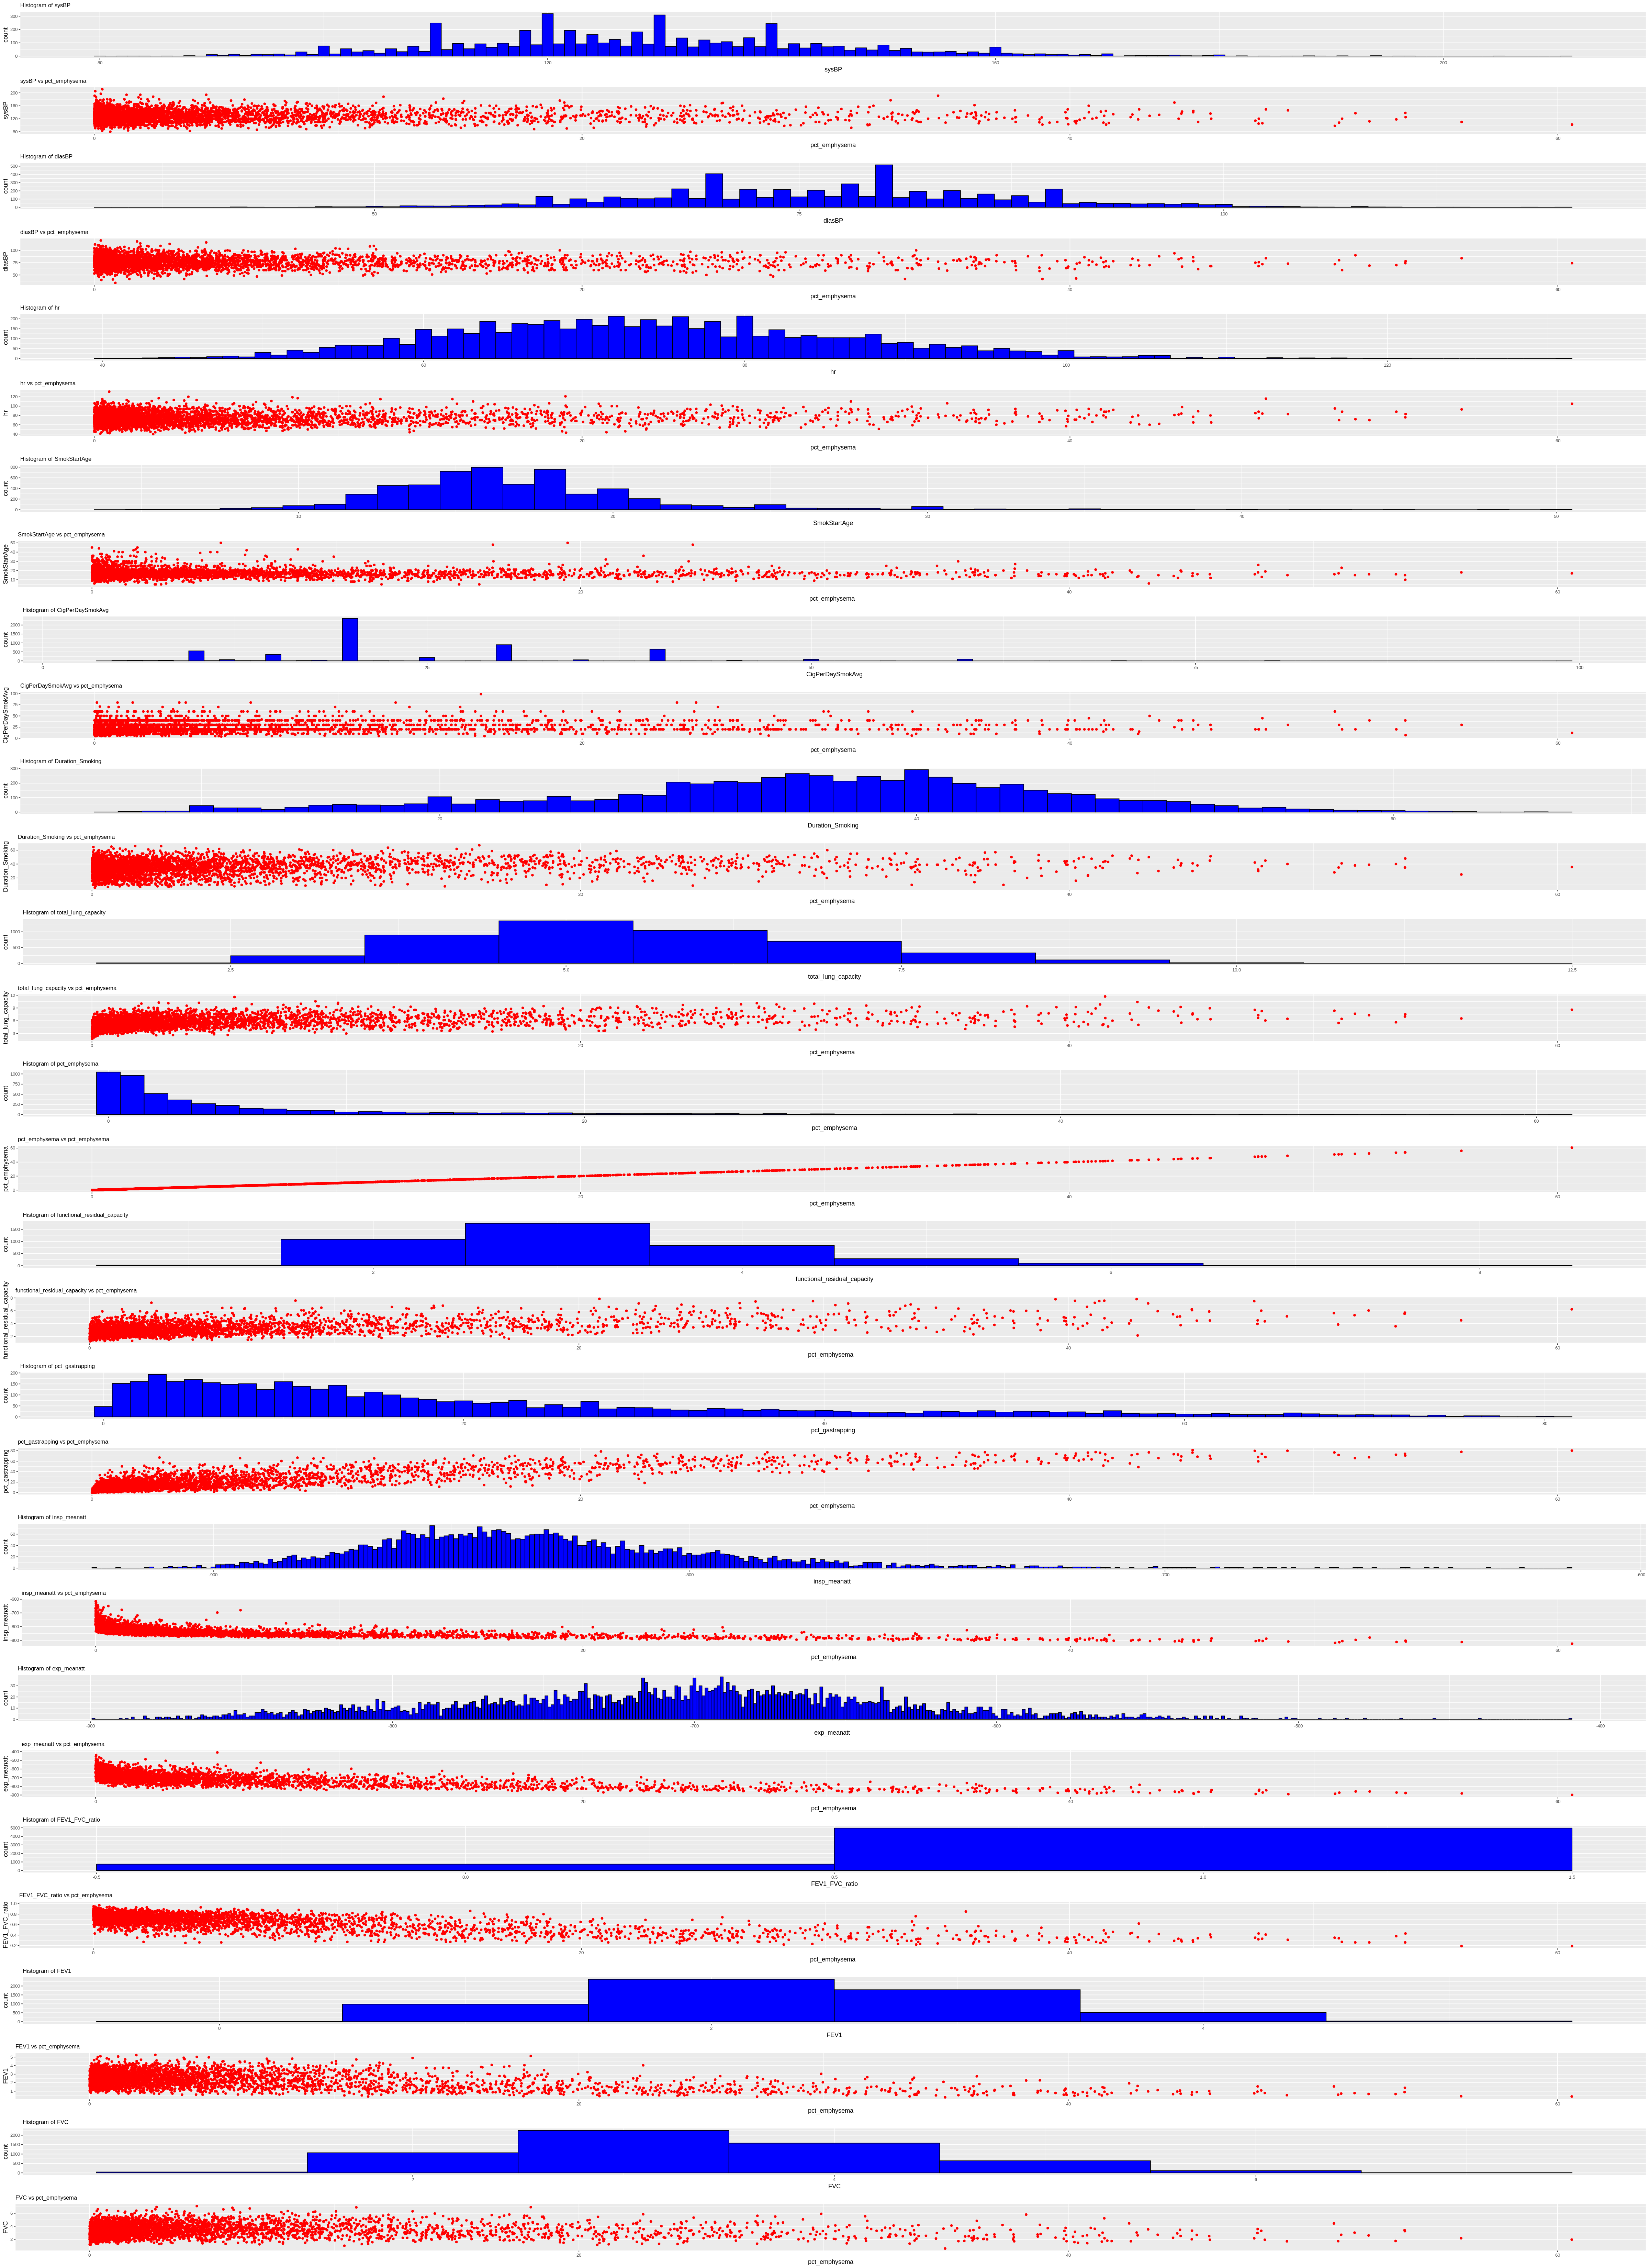

In [ ]:
# Set the size of the plots
options(repr.plot.width = 40, repr.plot.height = 55)  # Adjust these values as needed for your display

# Generate plots for each variable
all_plots <- list()
for (var in original_vars) {
  # Histogram plot for the variable
  p_hist <- ggplot(copd, aes(x = !!sym(var))) +
            geom_histogram(binwidth = 1, fill="blue", color="black") +
            ggtitle(paste("Histogram of", var)) +
            theme(plot.title = element_text(size = 10),  # Adjust text size as needed
                  axis.text.x = element_text(size = 8),
                  axis.text.y = element_text(size = 8))

  # Scatter plot of the variable against visit_age
  p_scatter <- ggplot(copd, aes(x = pct_emphysema, y = !!sym(var))) +
               geom_point(color="red") +
               ggtitle(paste(var, "vs pct_emphysema")) +
               theme(plot.title = element_text(size = 10),  # Adjust text size as needed
                     axis.text.x = element_text(size = 8),
                     axis.text.y = element_text(size = 8))

  # Add plots to the list
  all_plots[[length(all_plots) + 1]] <- p_hist
  all_plots[[length(all_plots) + 1]] <- p_scatter
}

# Arrange the plots in a grid with a single column
grid.arrange(grobs = all_plots, ncol = 1)


4.Using Advanced Packages for Missing Data Visualization

# Scatterplots To understand relationships


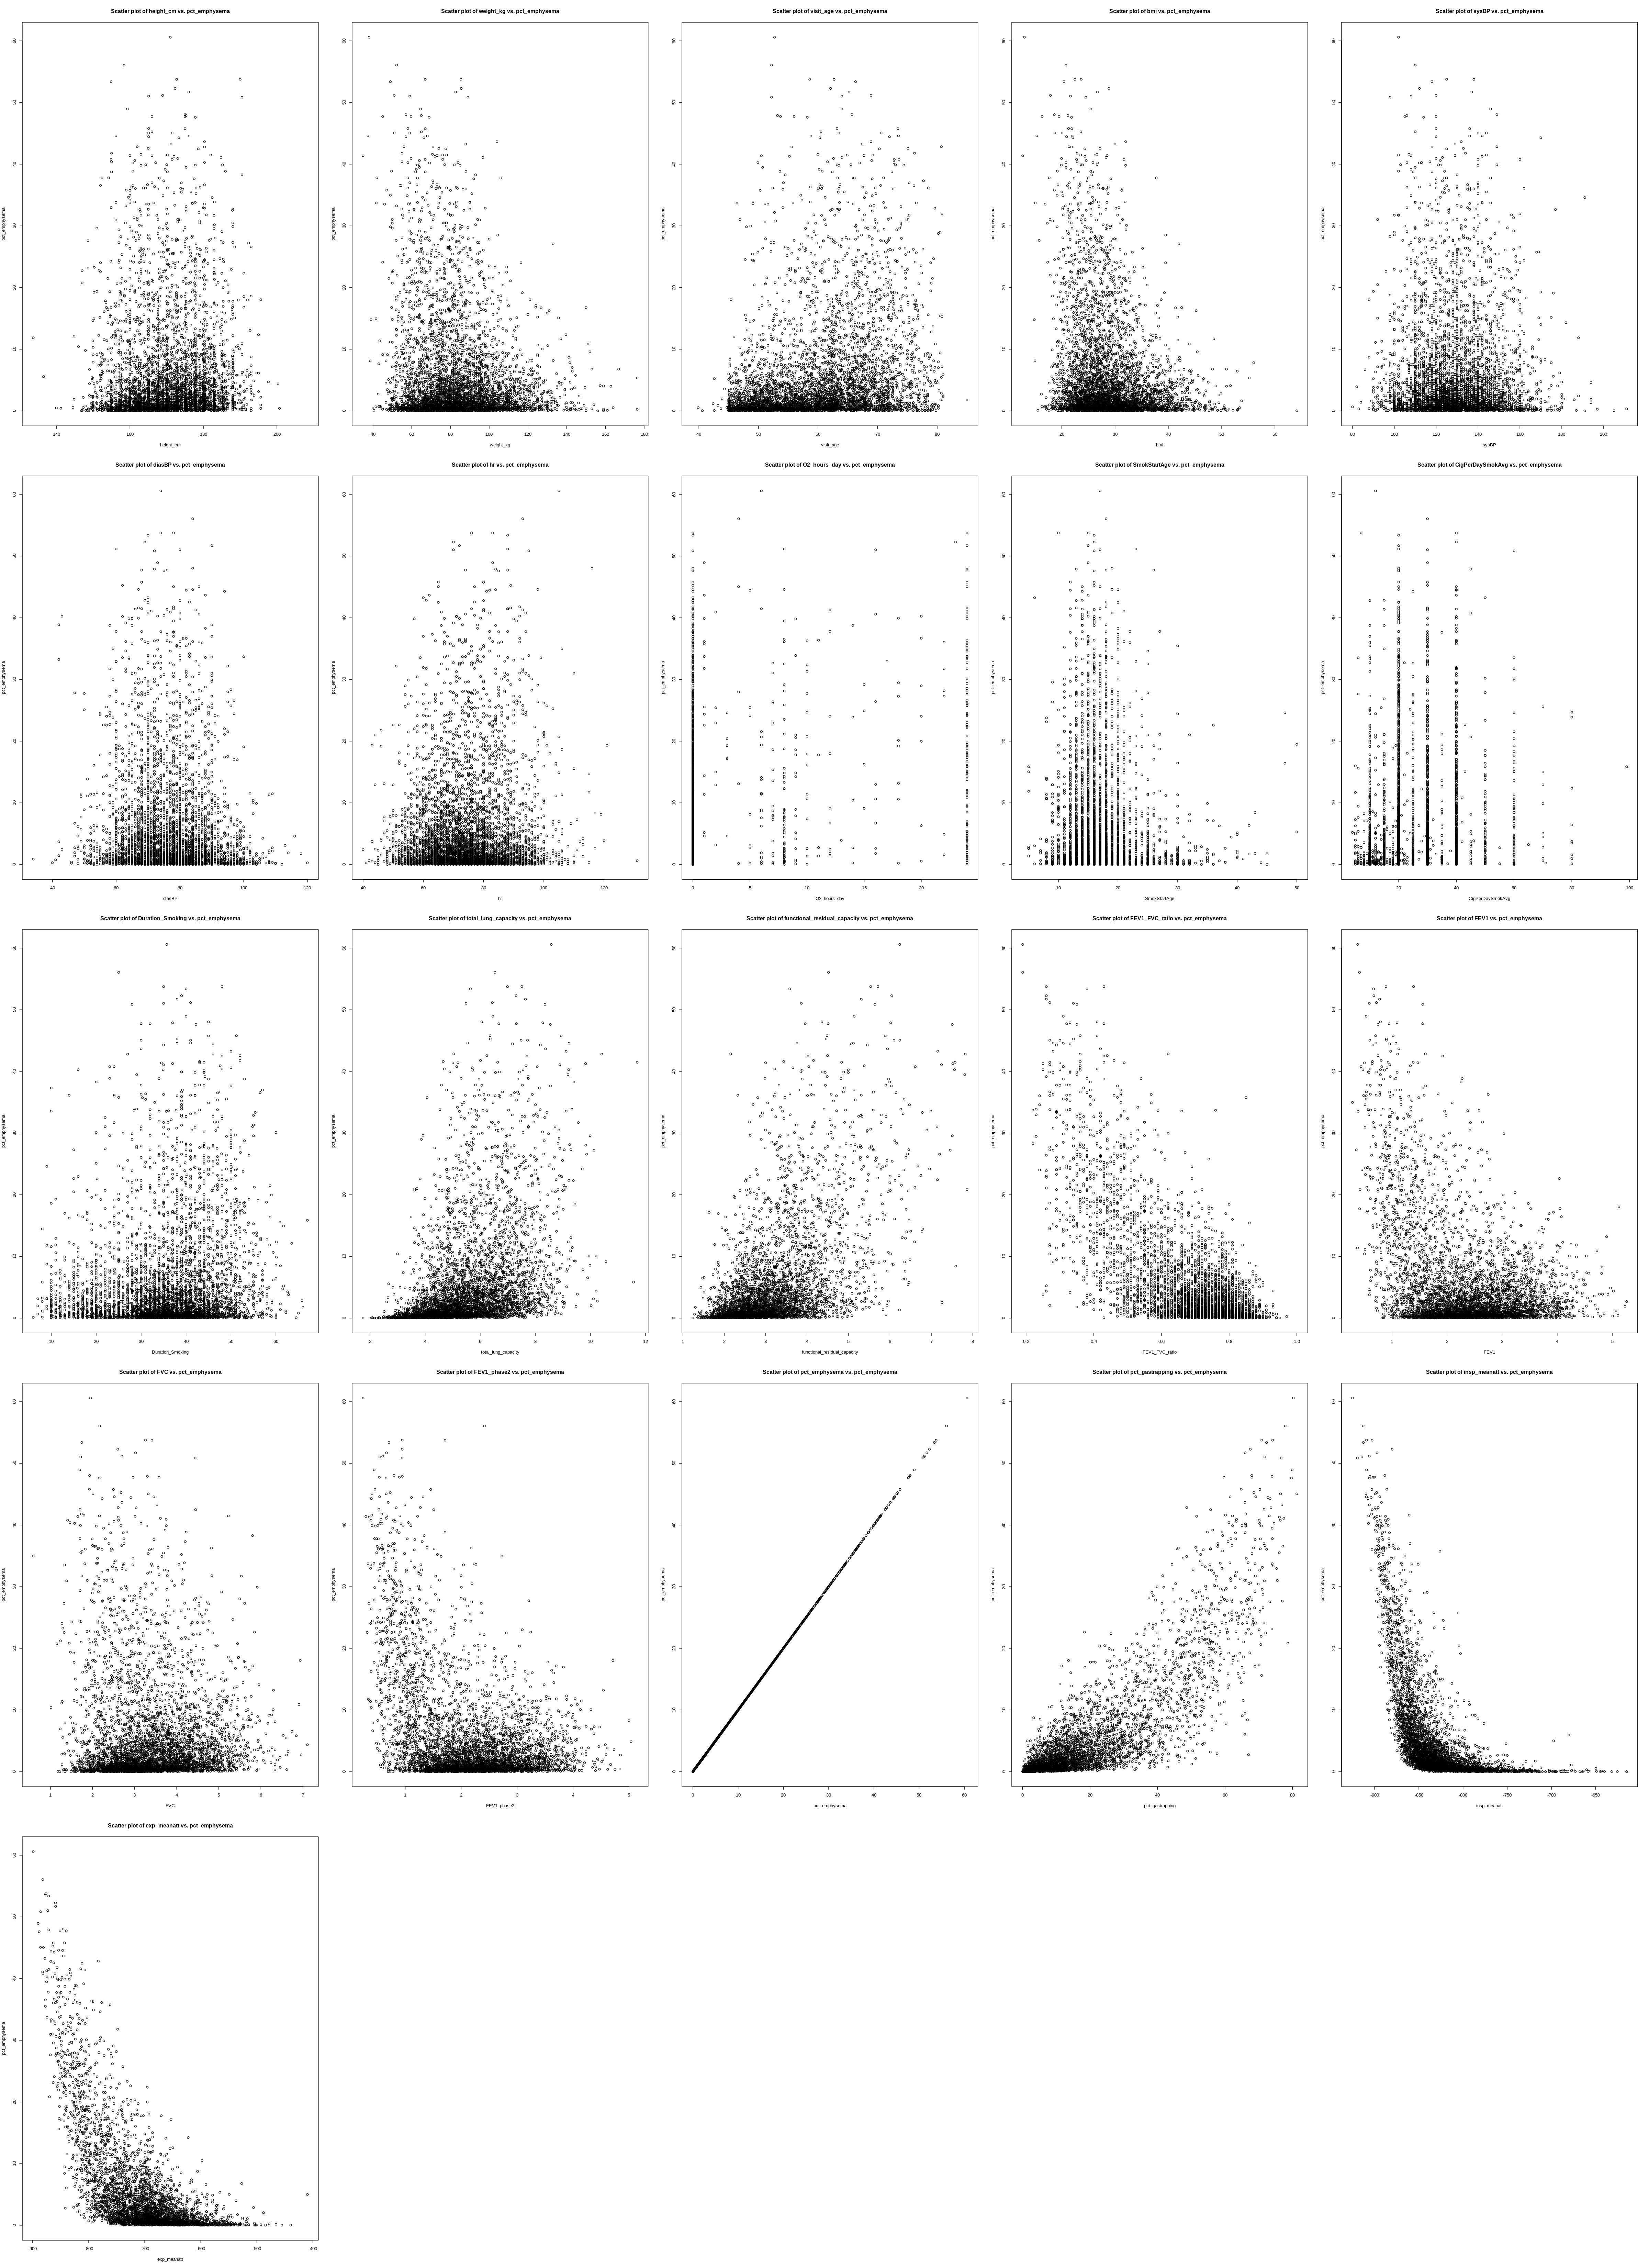

In [ ]:
# Scatter plots for numerical variables
numerical_vars <- c("height_cm", "weight_kg", "visit_age", "bmi", "sysBP", "diasBP", "hr", "O2_hours_day",
                    "SmokStartAge", "CigPerDaySmokAvg", "Duration_Smoking", "total_lung_capacity",
                    "functional_residual_capacity", "FEV1_FVC_ratio", "FEV1", "FVC", "FEV1_phase2",
                    "pct_emphysema", "pct_gastrapping", "insp_meanatt", "exp_meanatt")

par(mfrow = c(5, 5))  # Adjust the layout based on the number of variables
for (var in numerical_vars) {
  # Debugging statement
  if (!var %in% names(copd)) {
    stop(paste("Variable", var, "does not exist in the data frame. Check variable names."))
  }

  plot(copd[[var]], copd$pct_emphysema, main = paste("Scatter plot of", var, "vs. pct_emphysema"),
       xlab = var, ylab = "pct_emphysema")
}

# Handling OUTLIERS

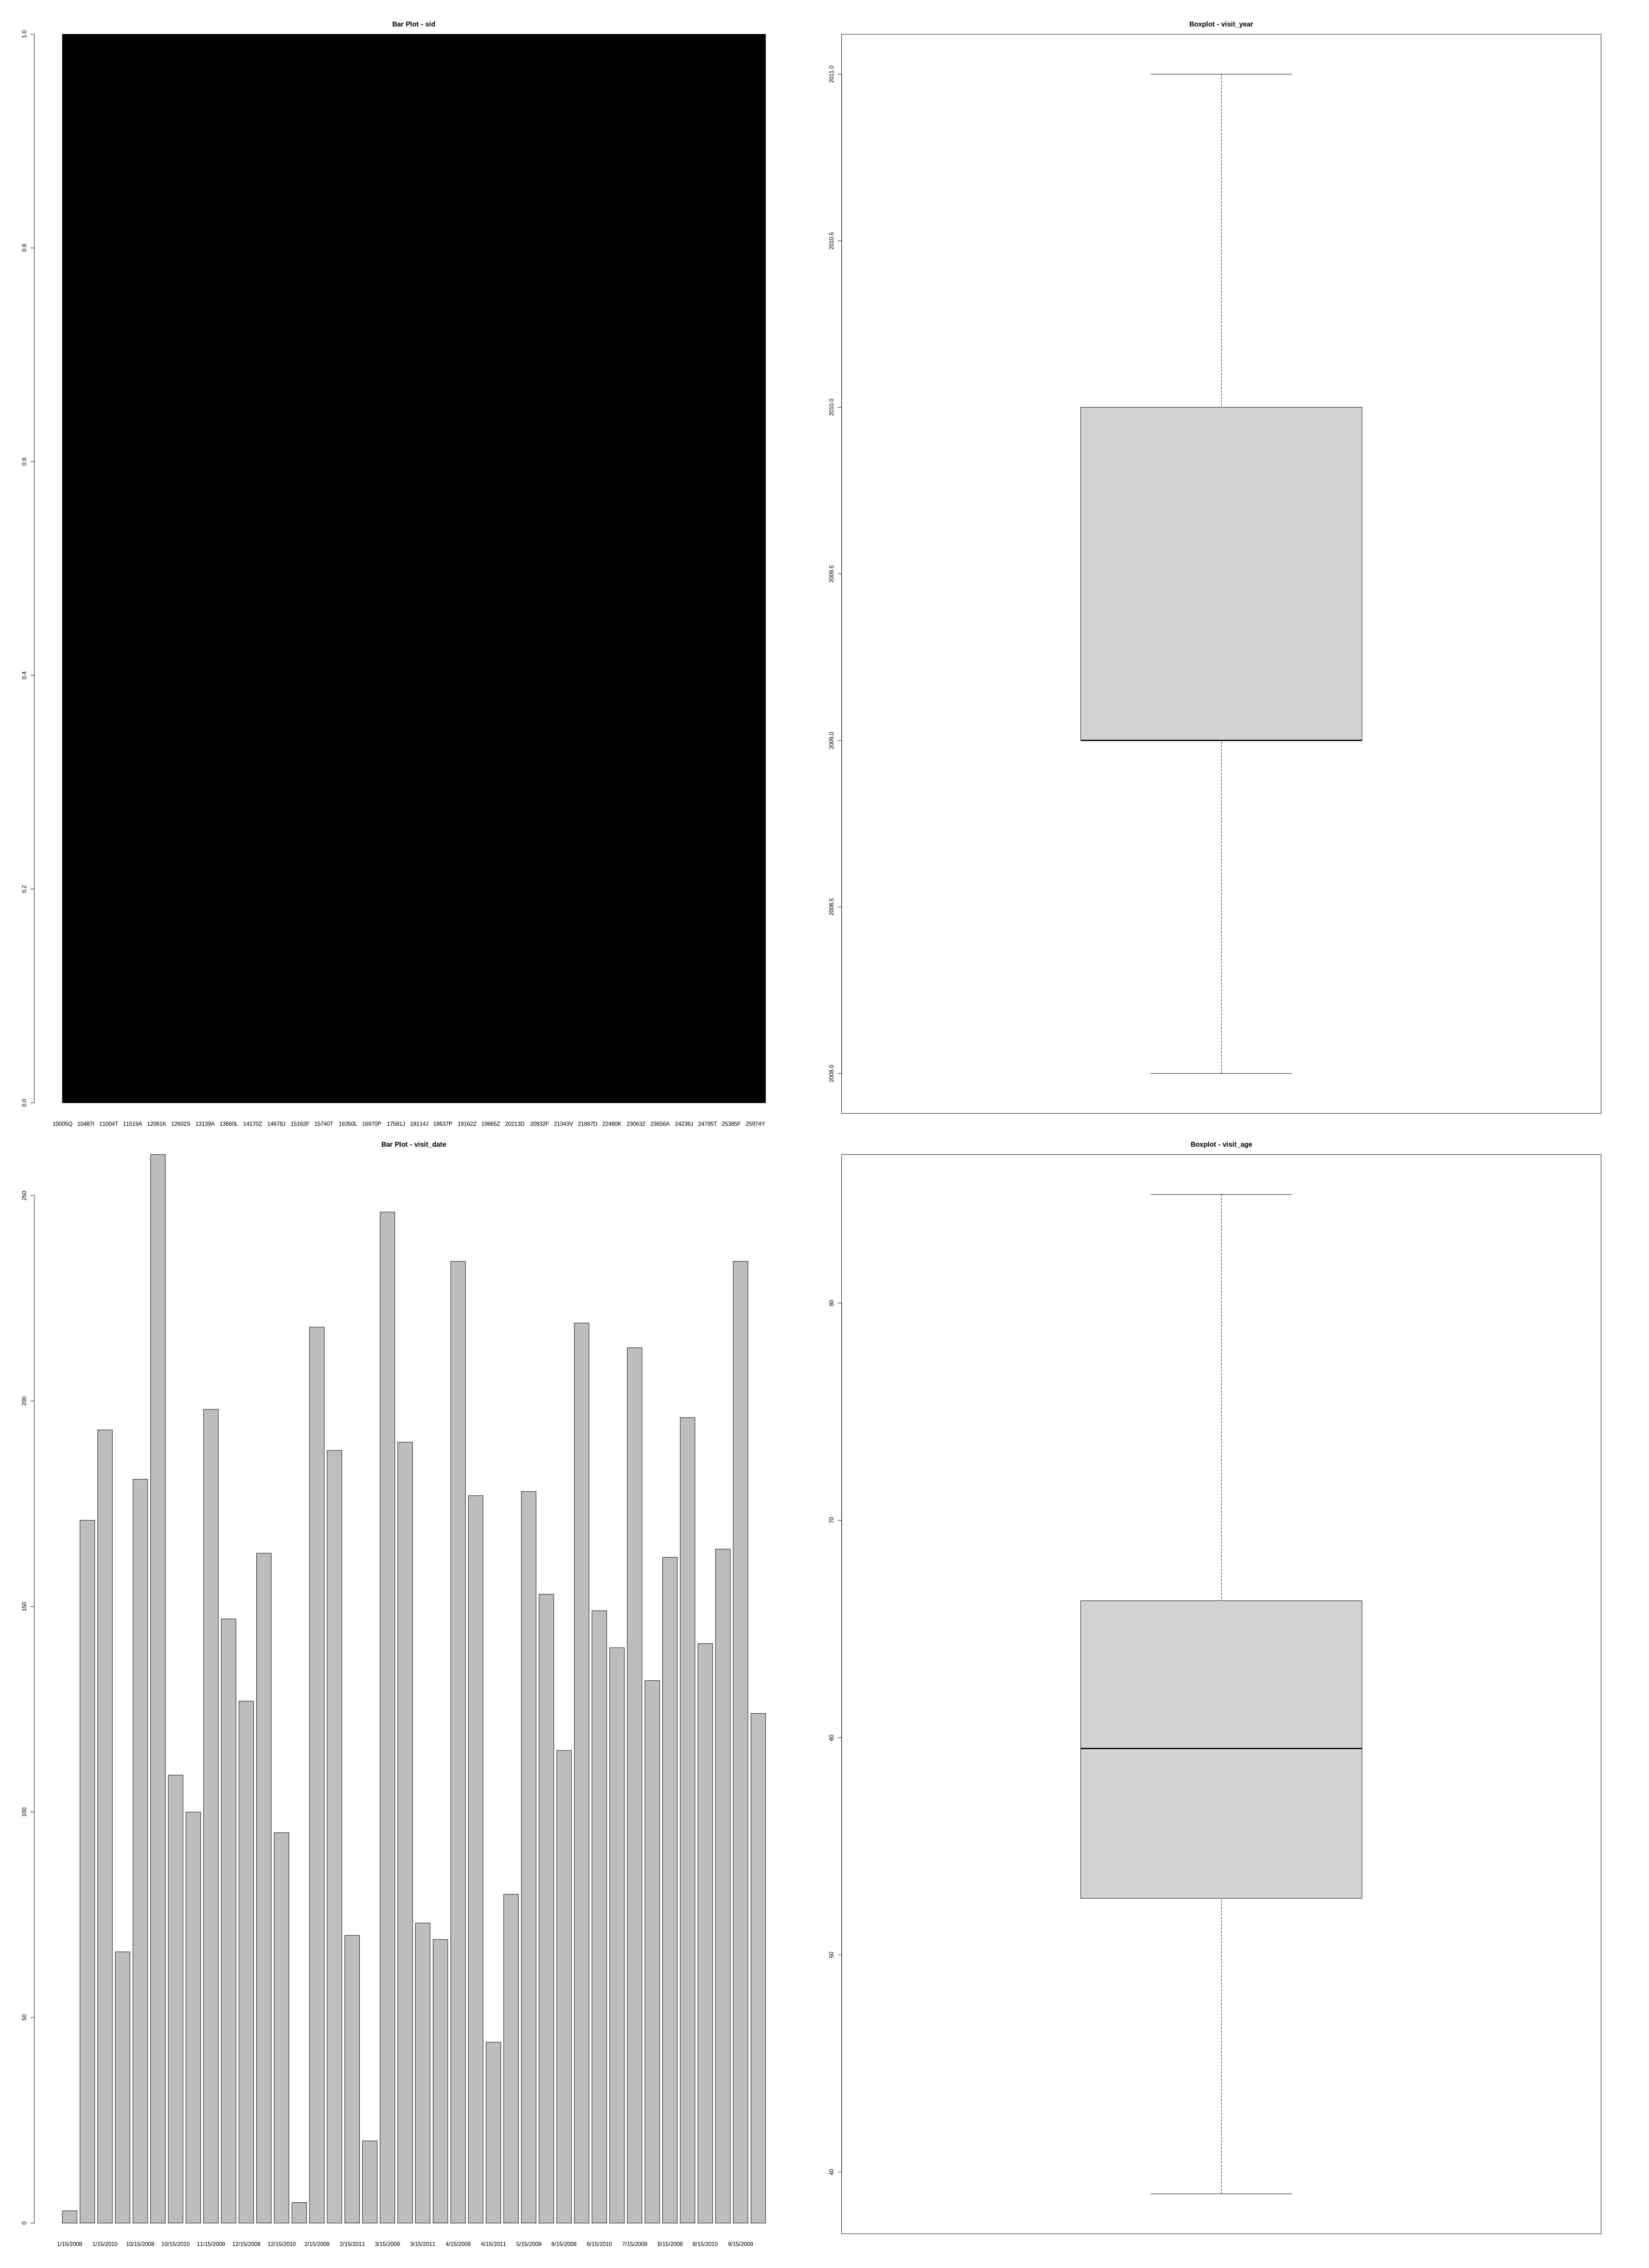

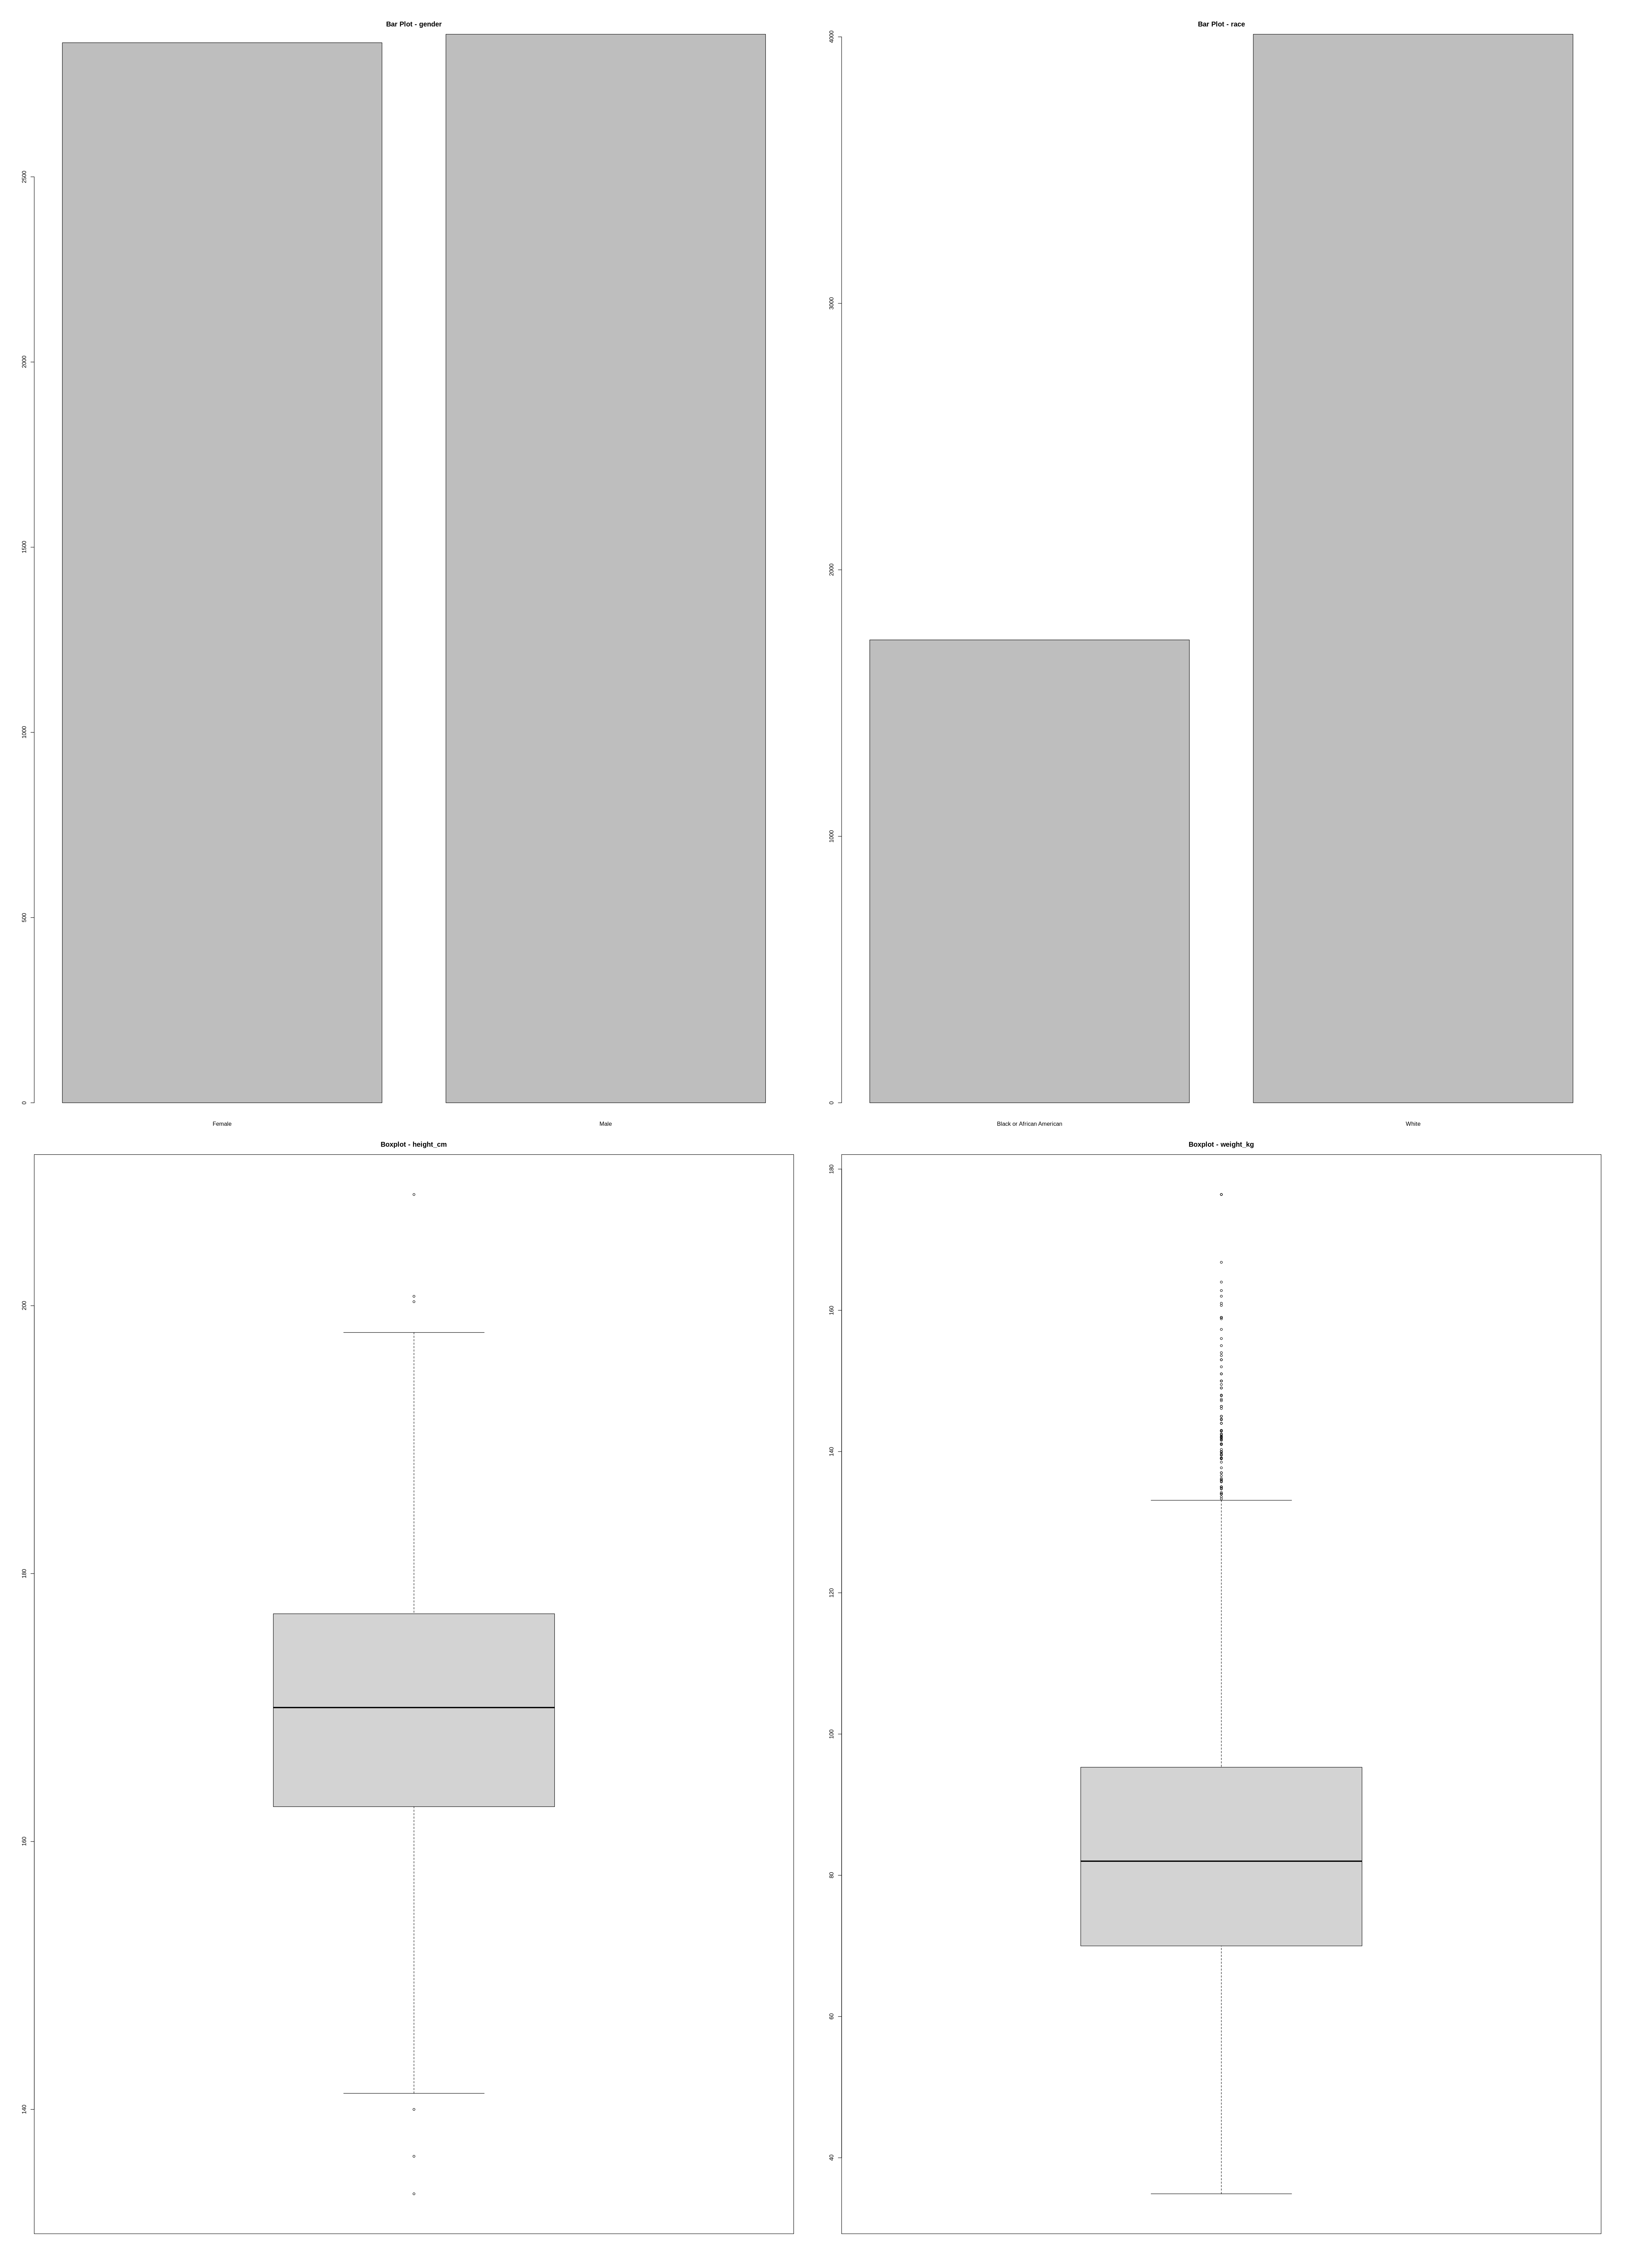

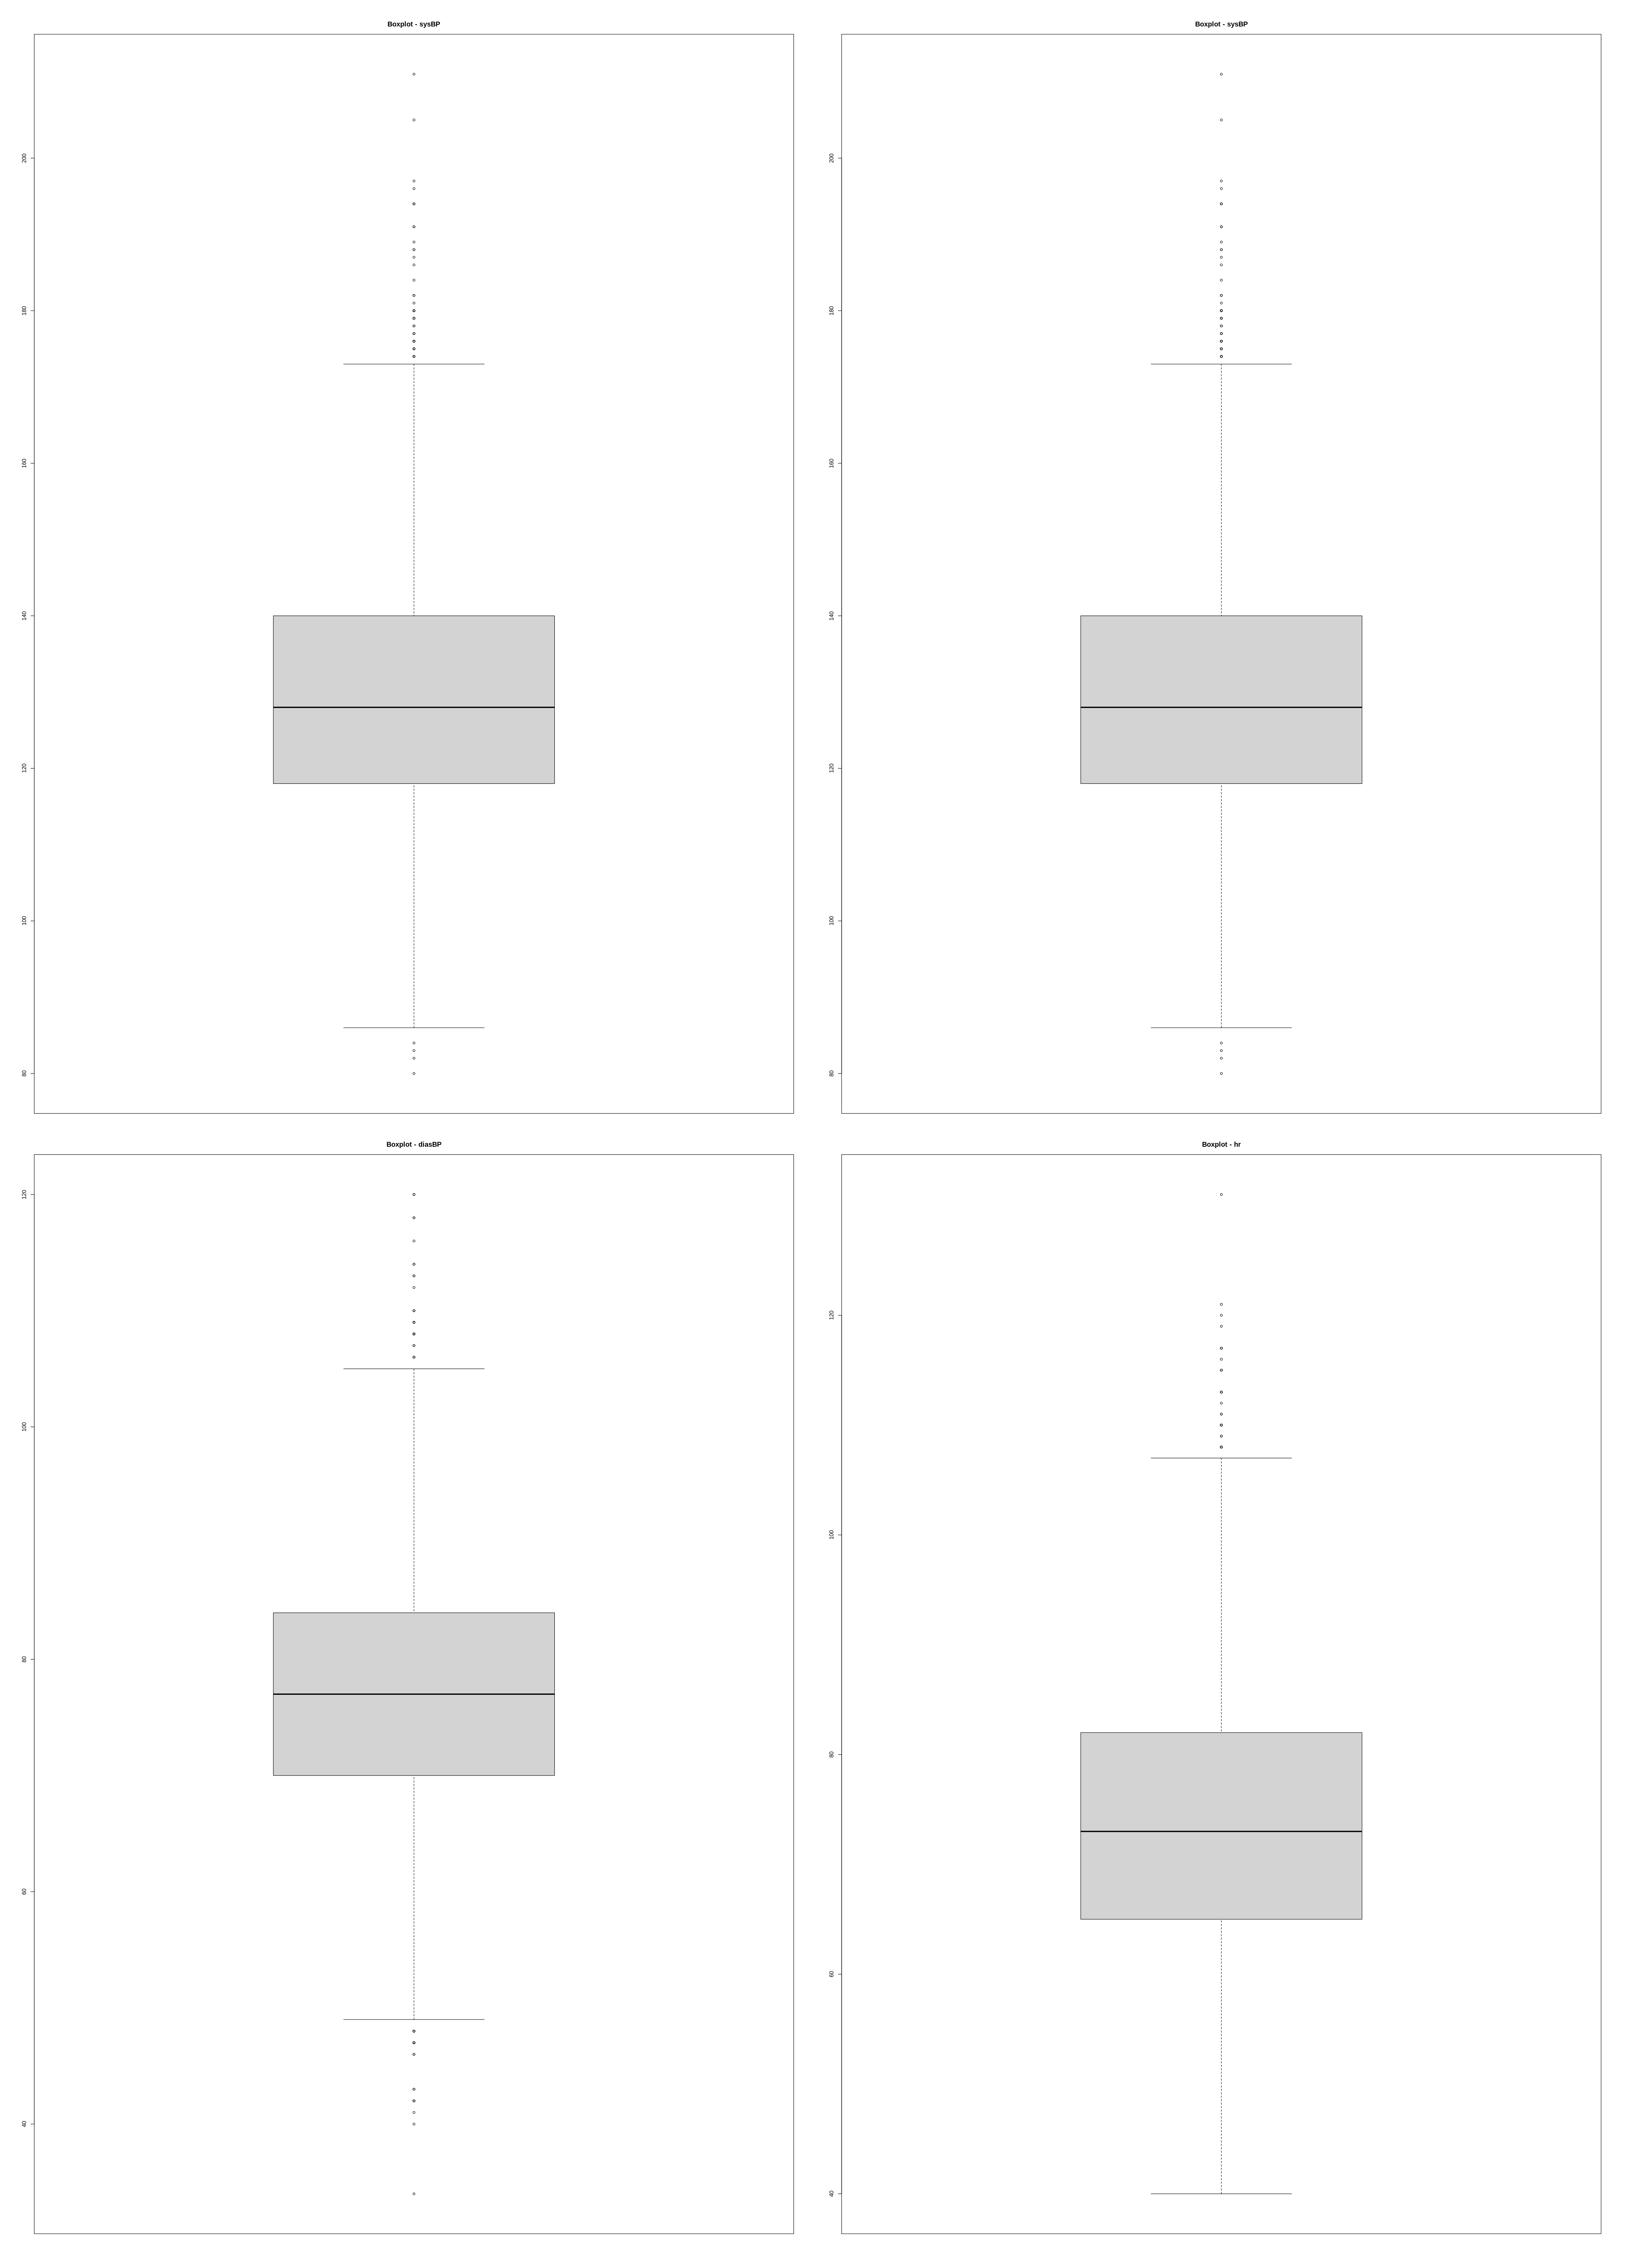

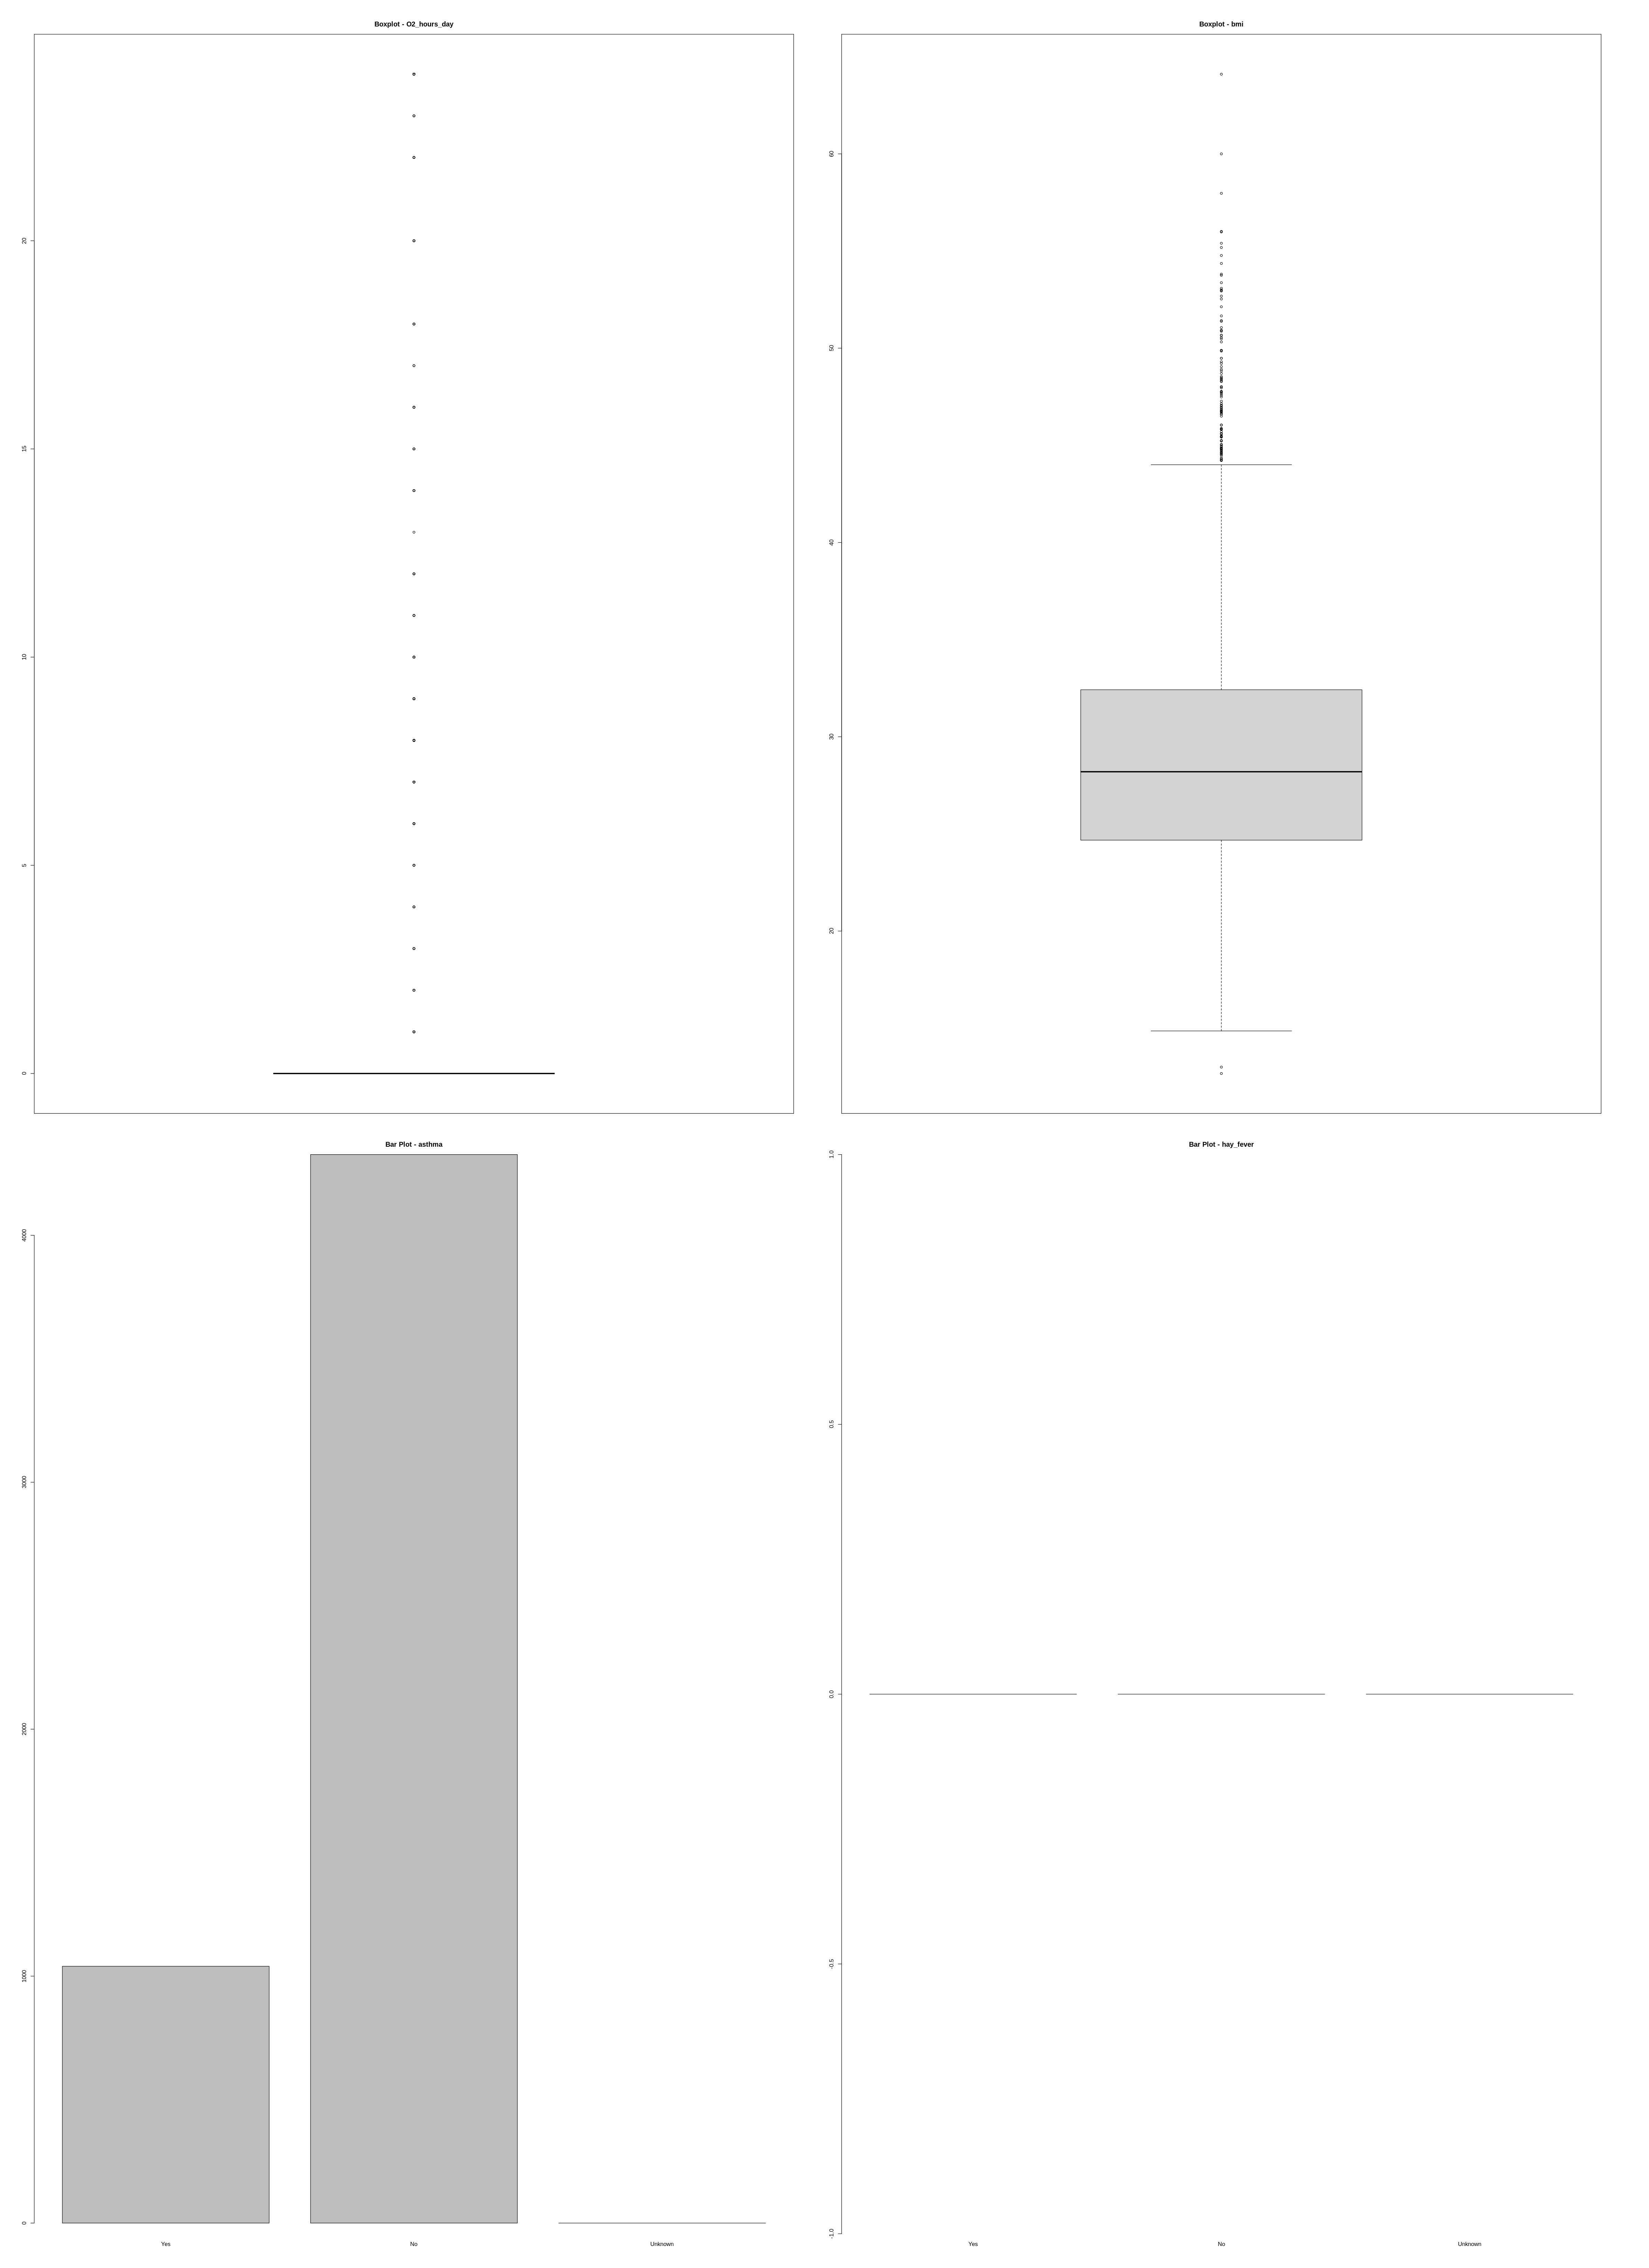

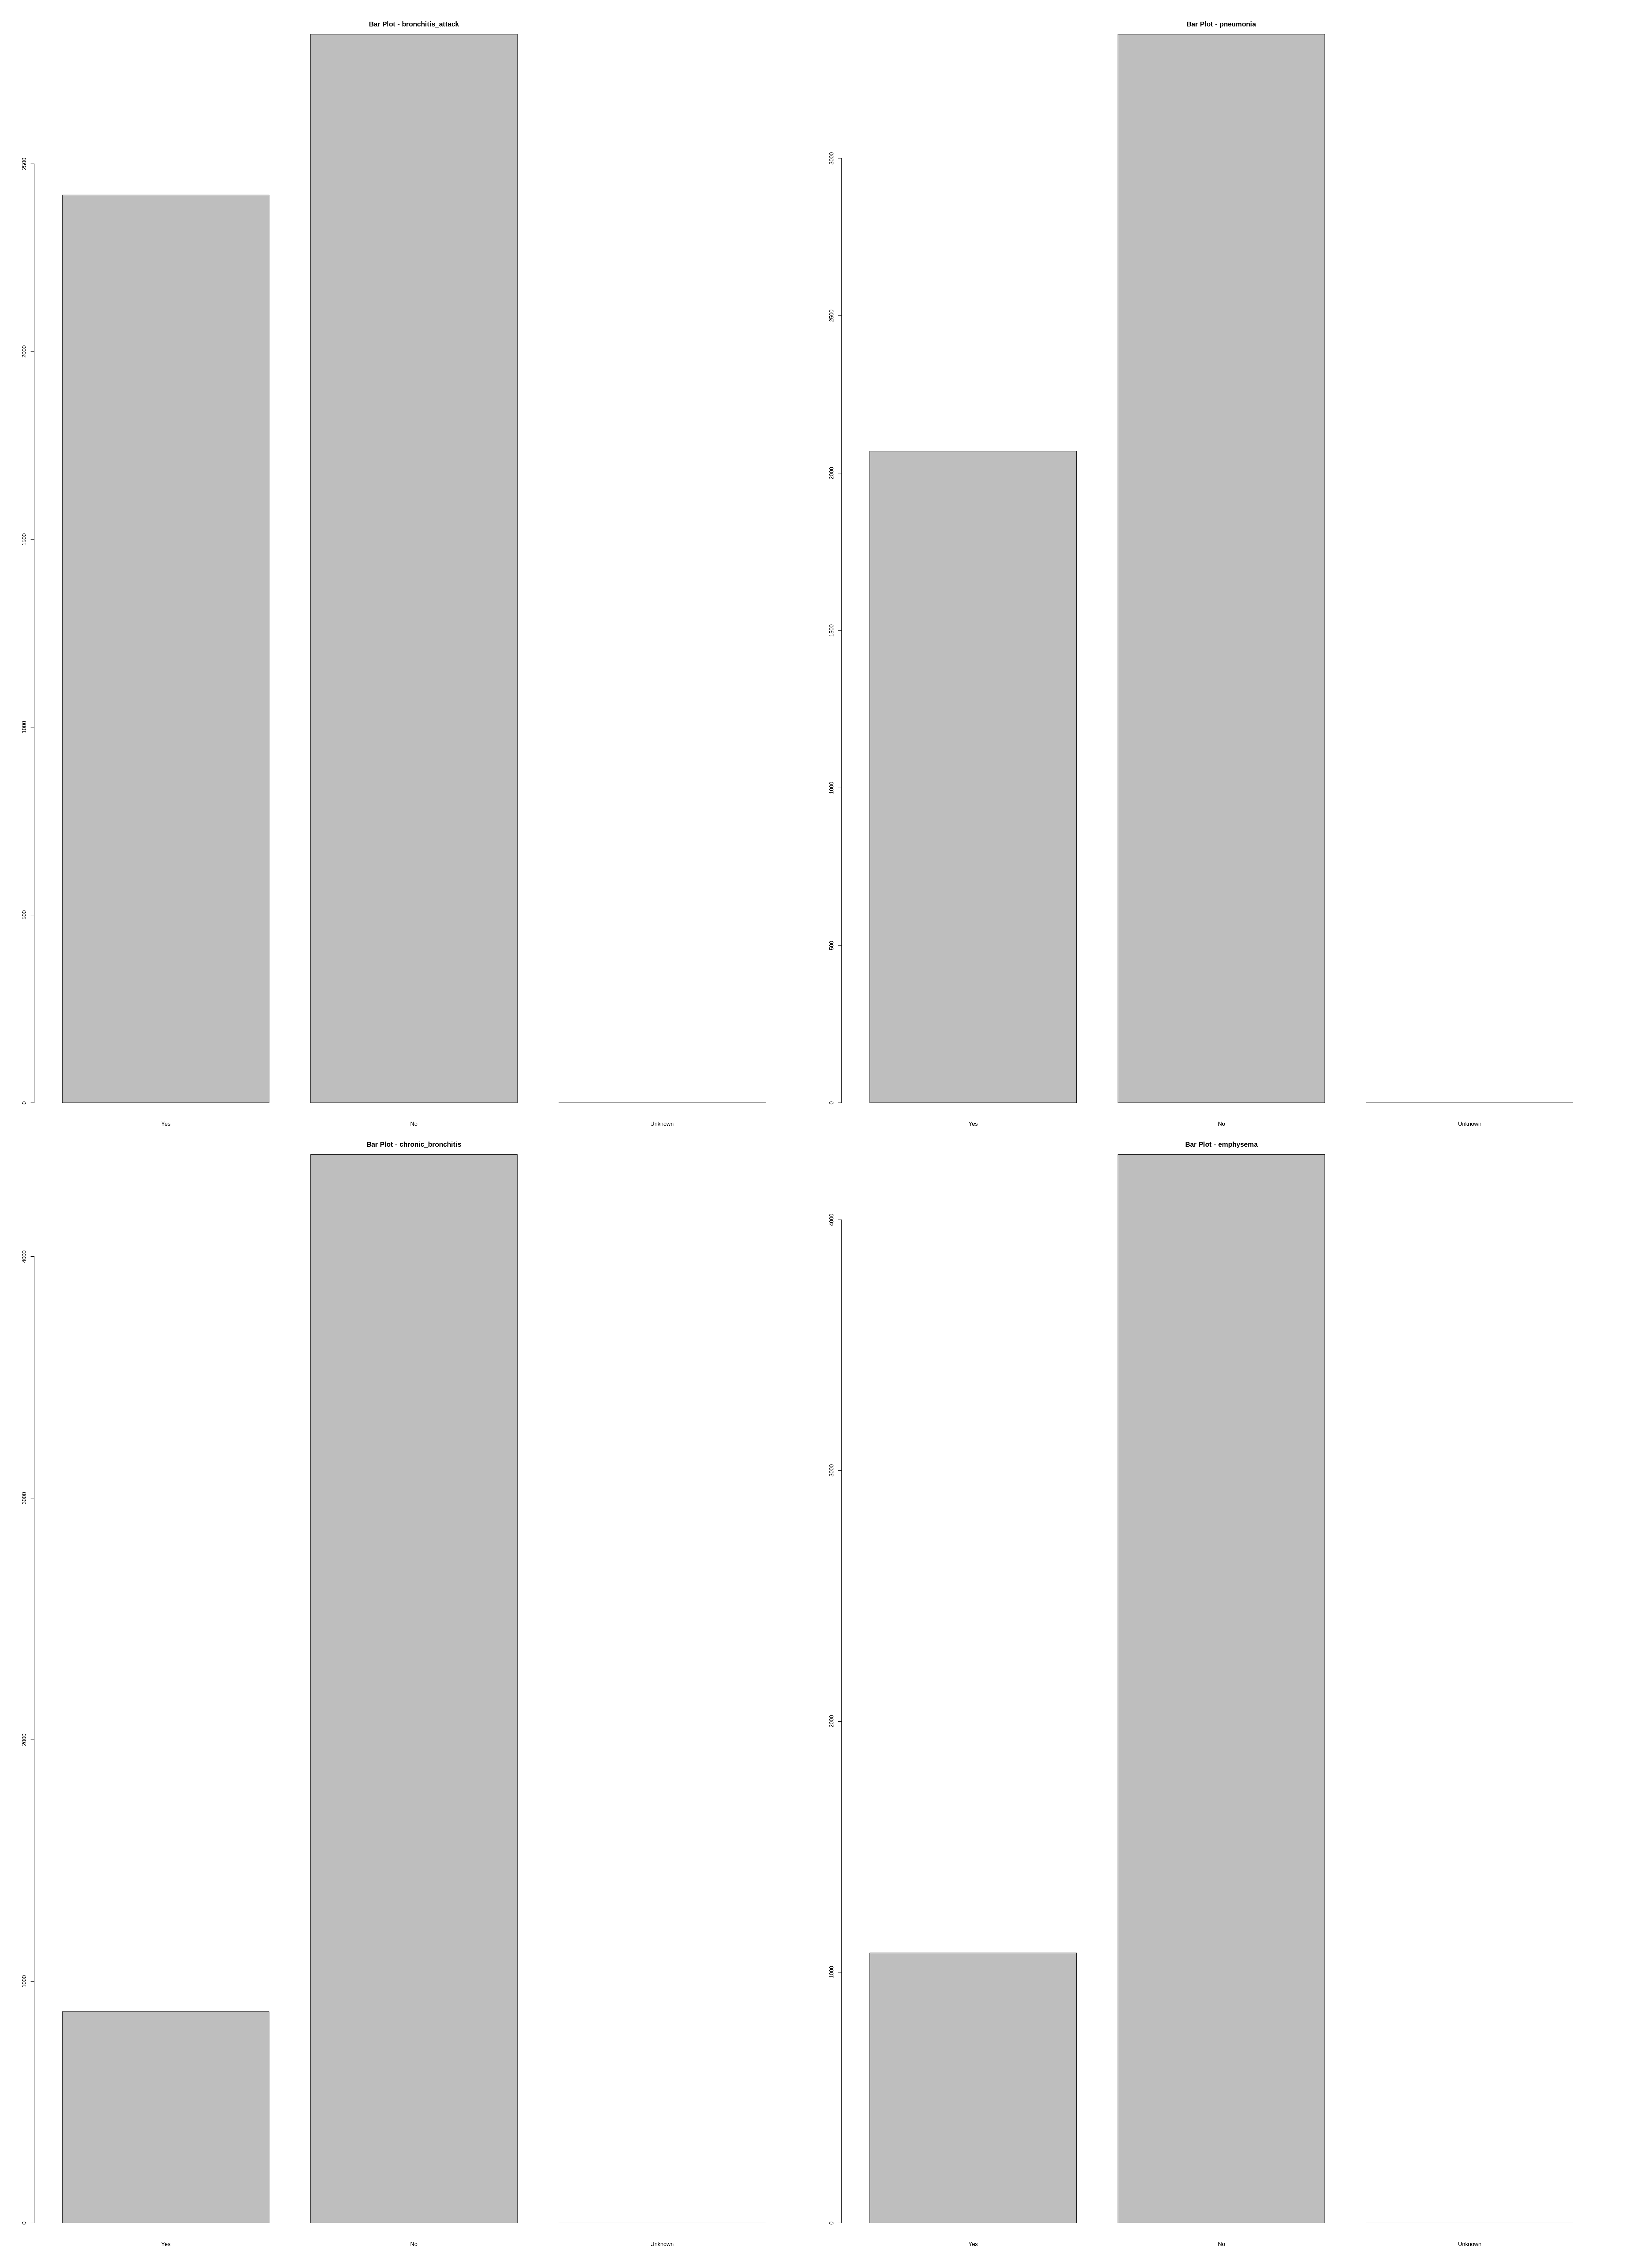

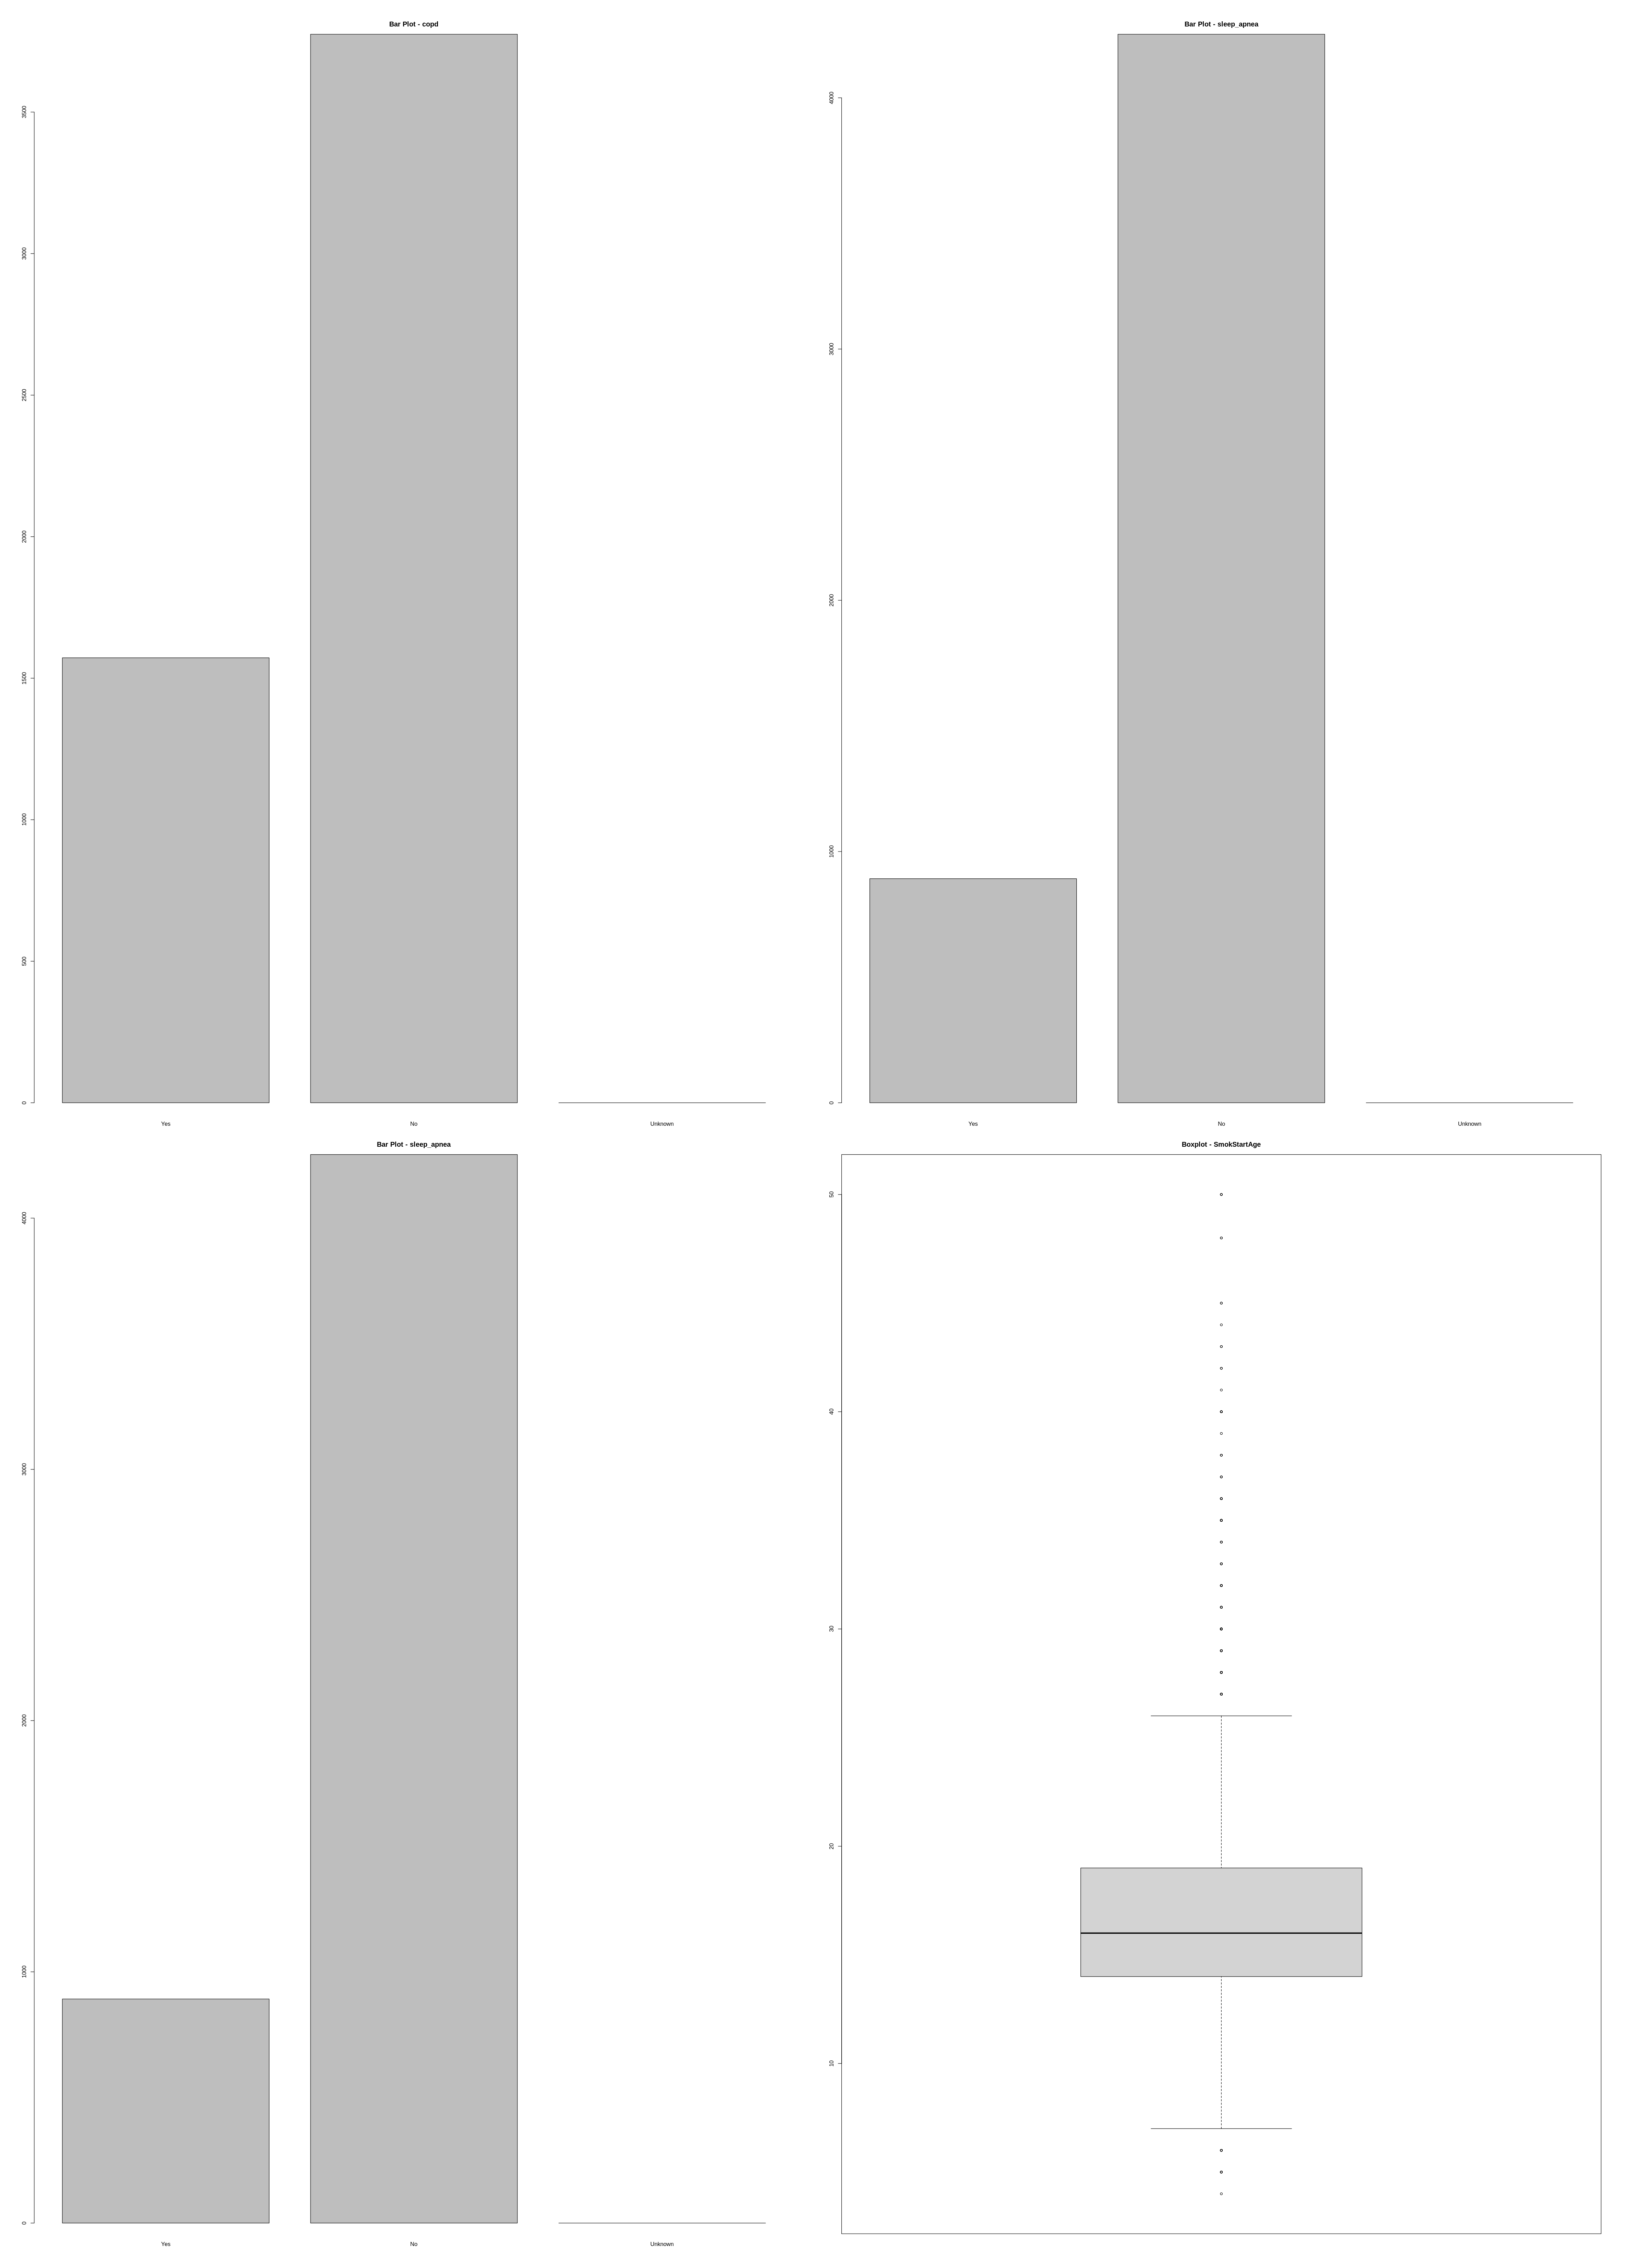

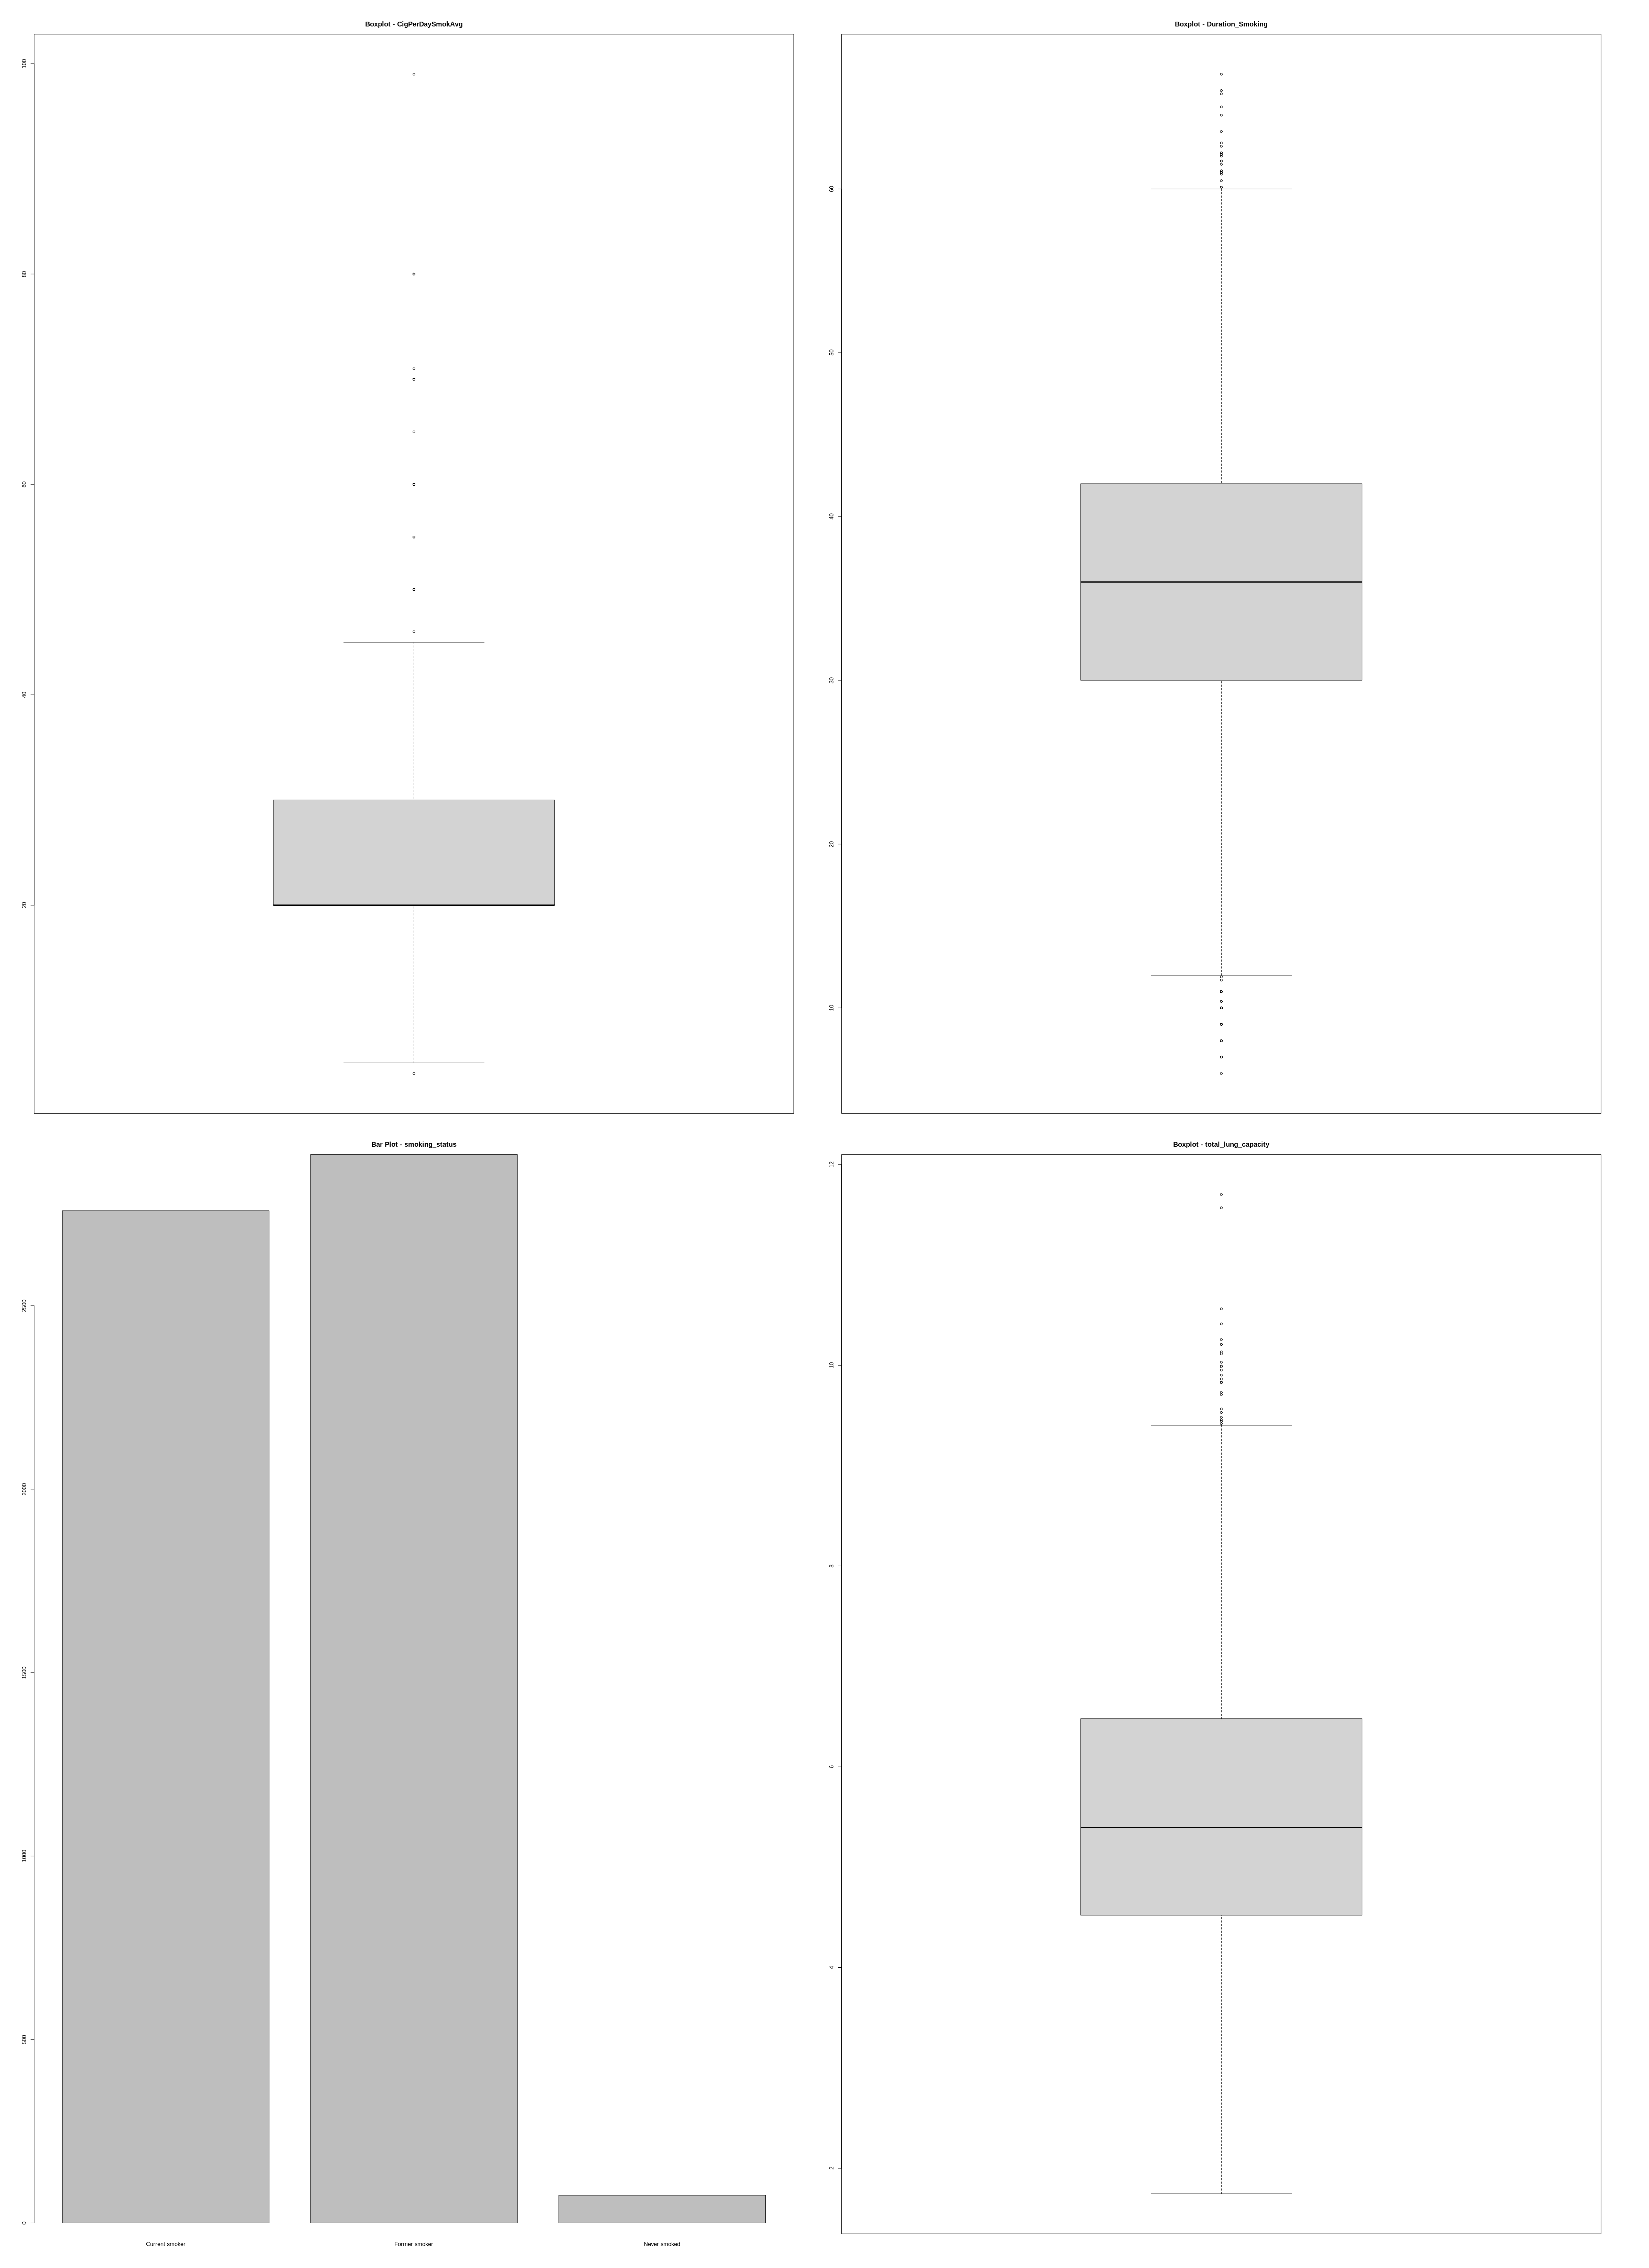

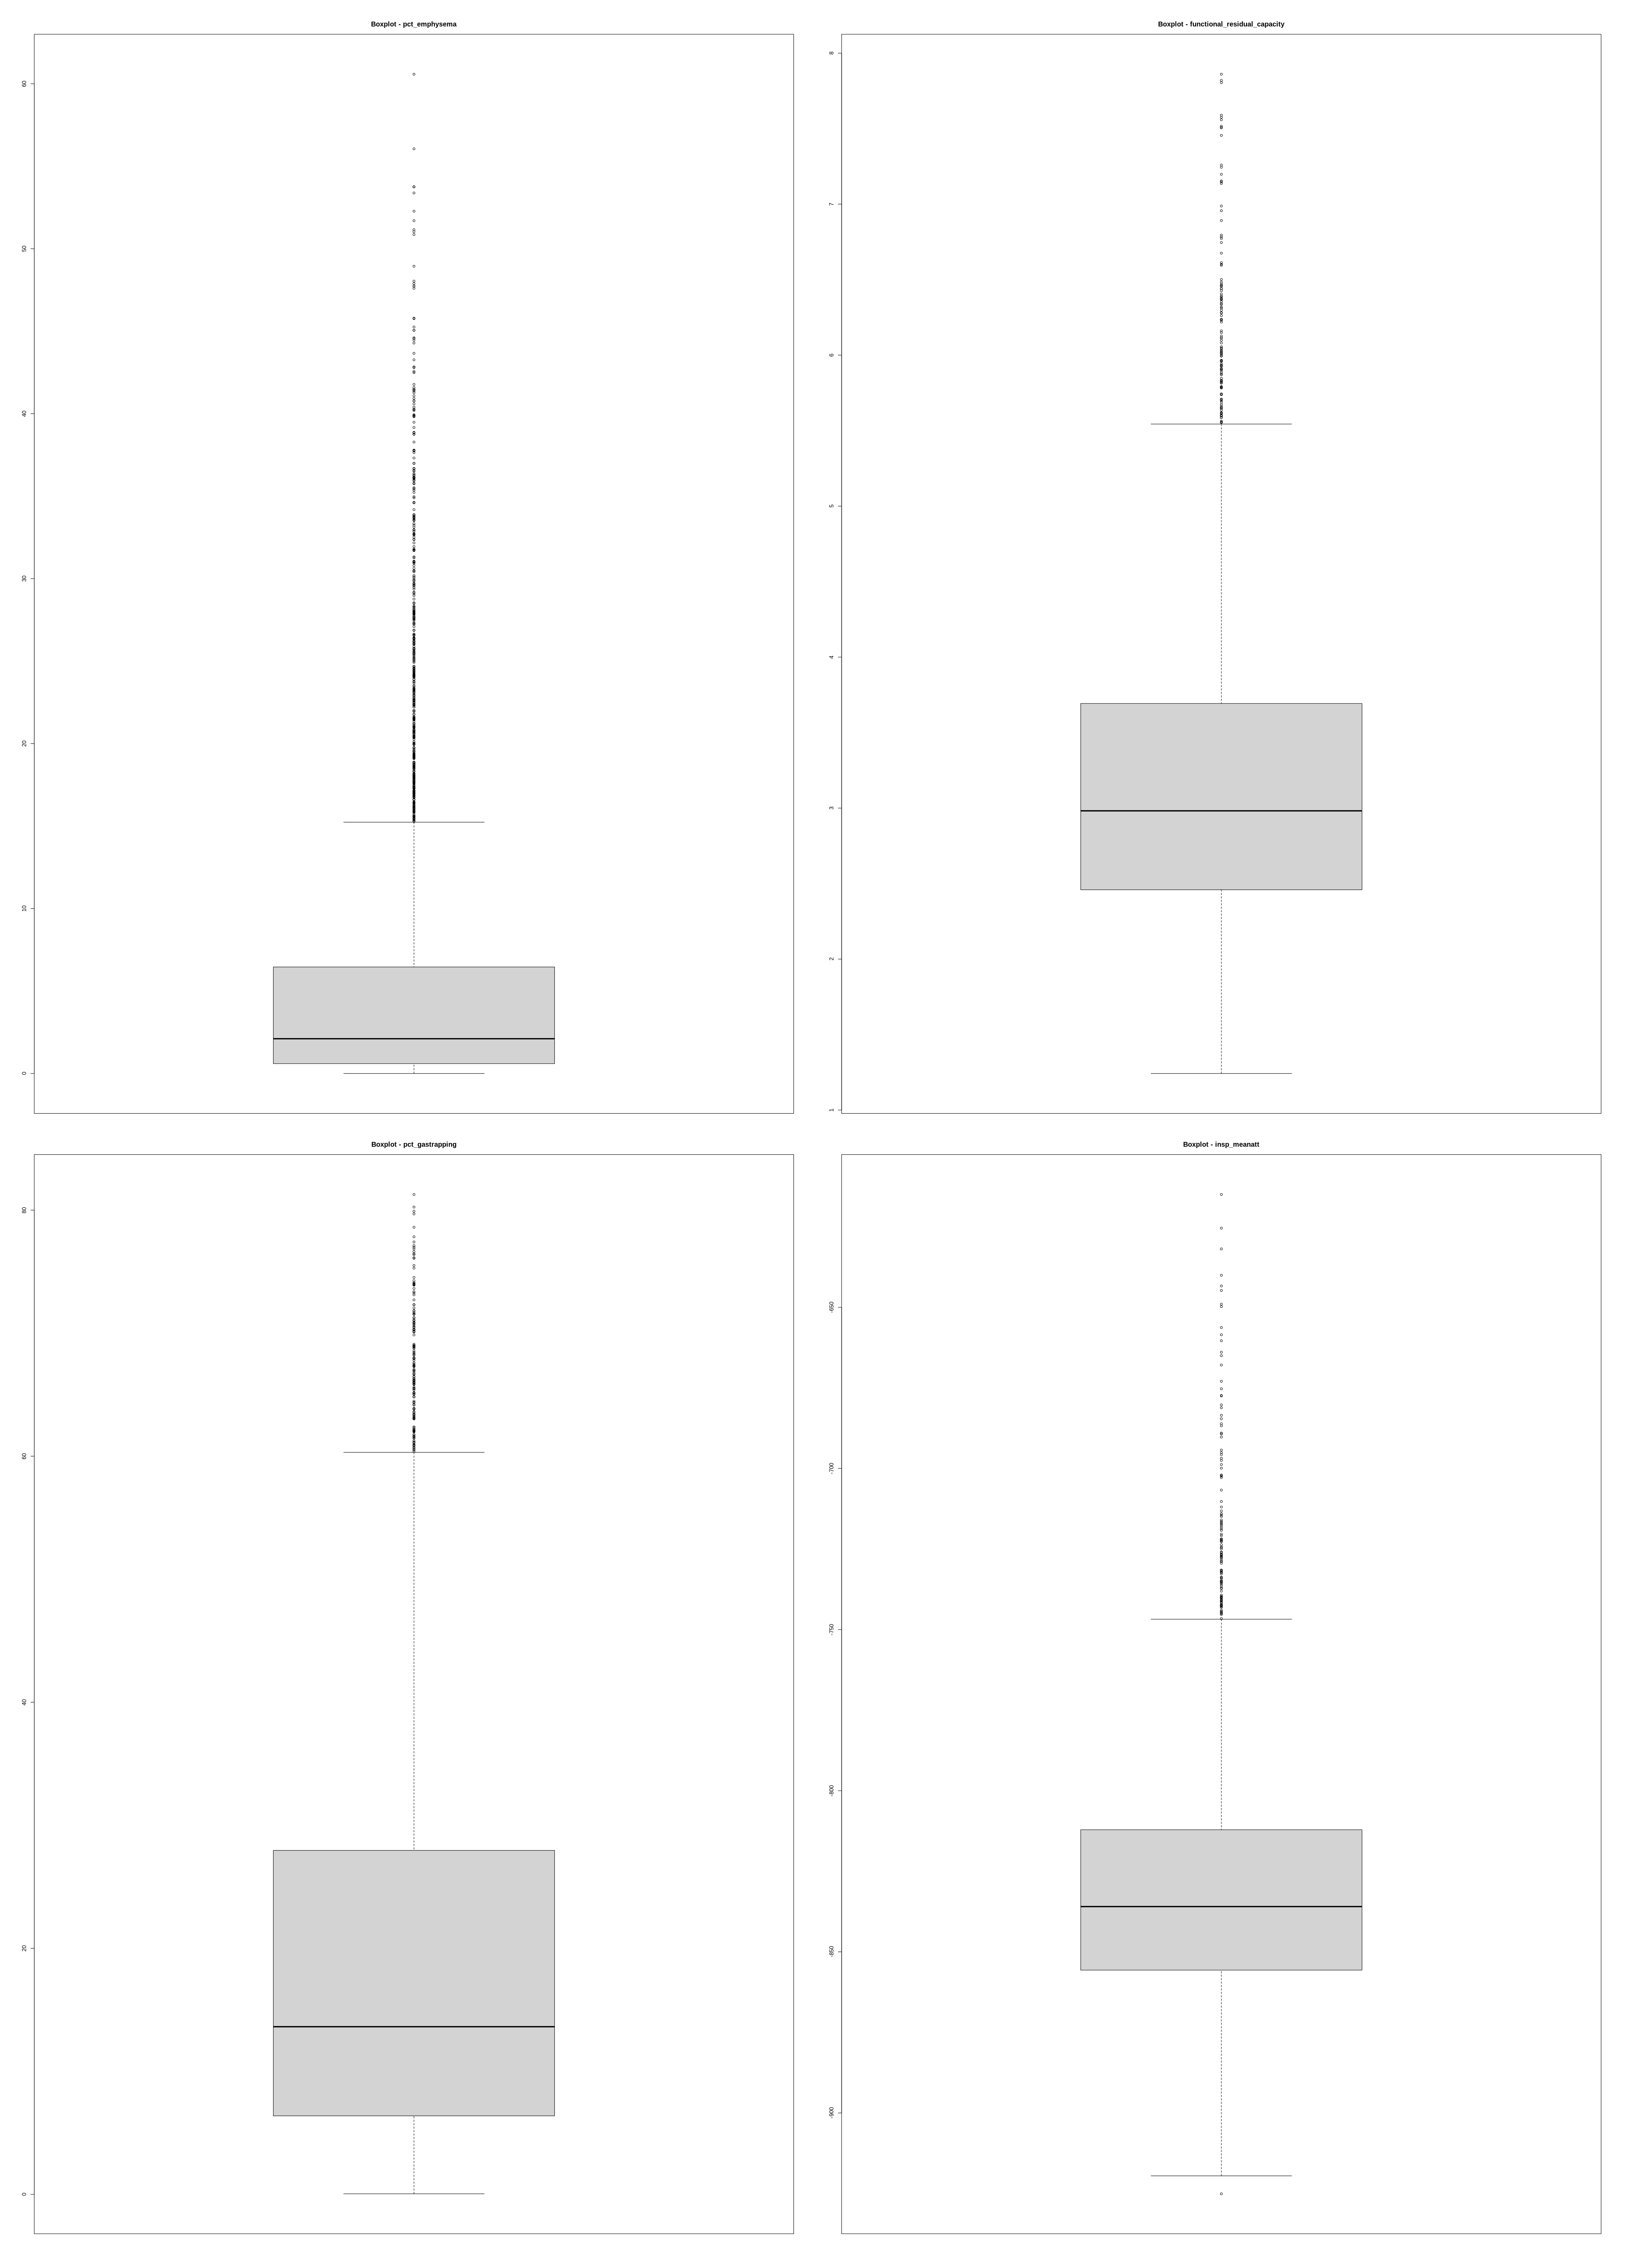

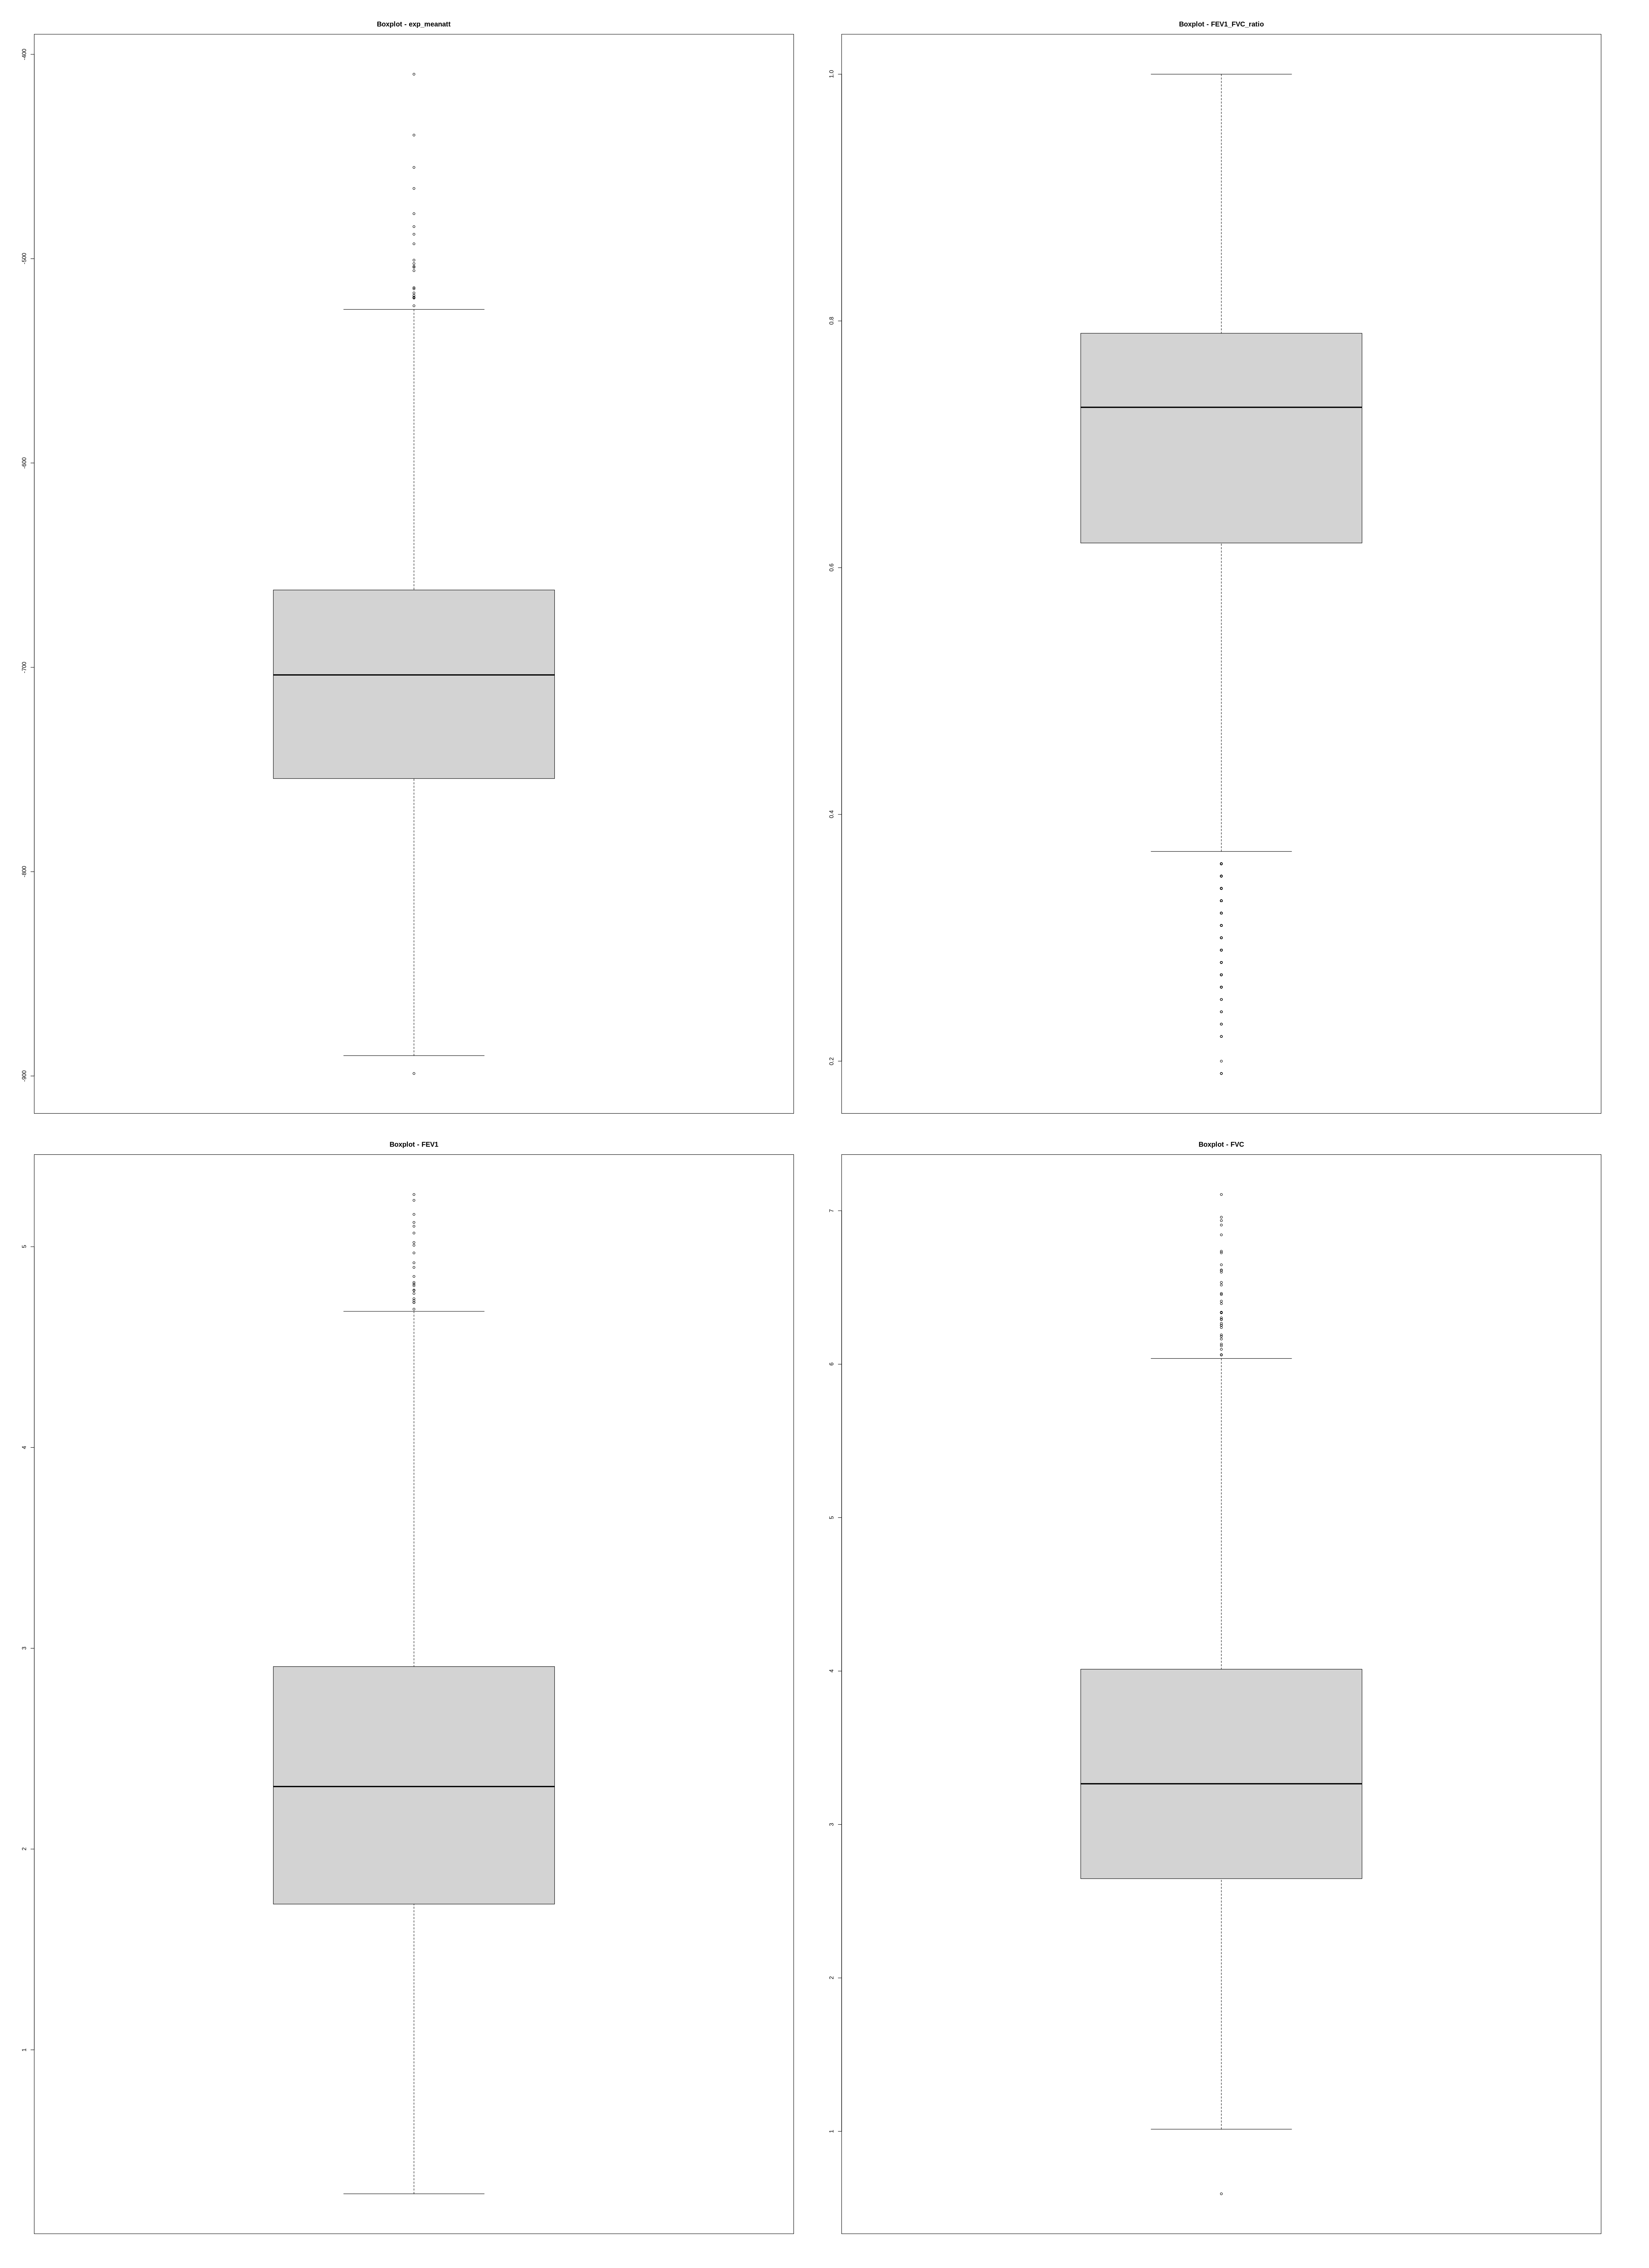

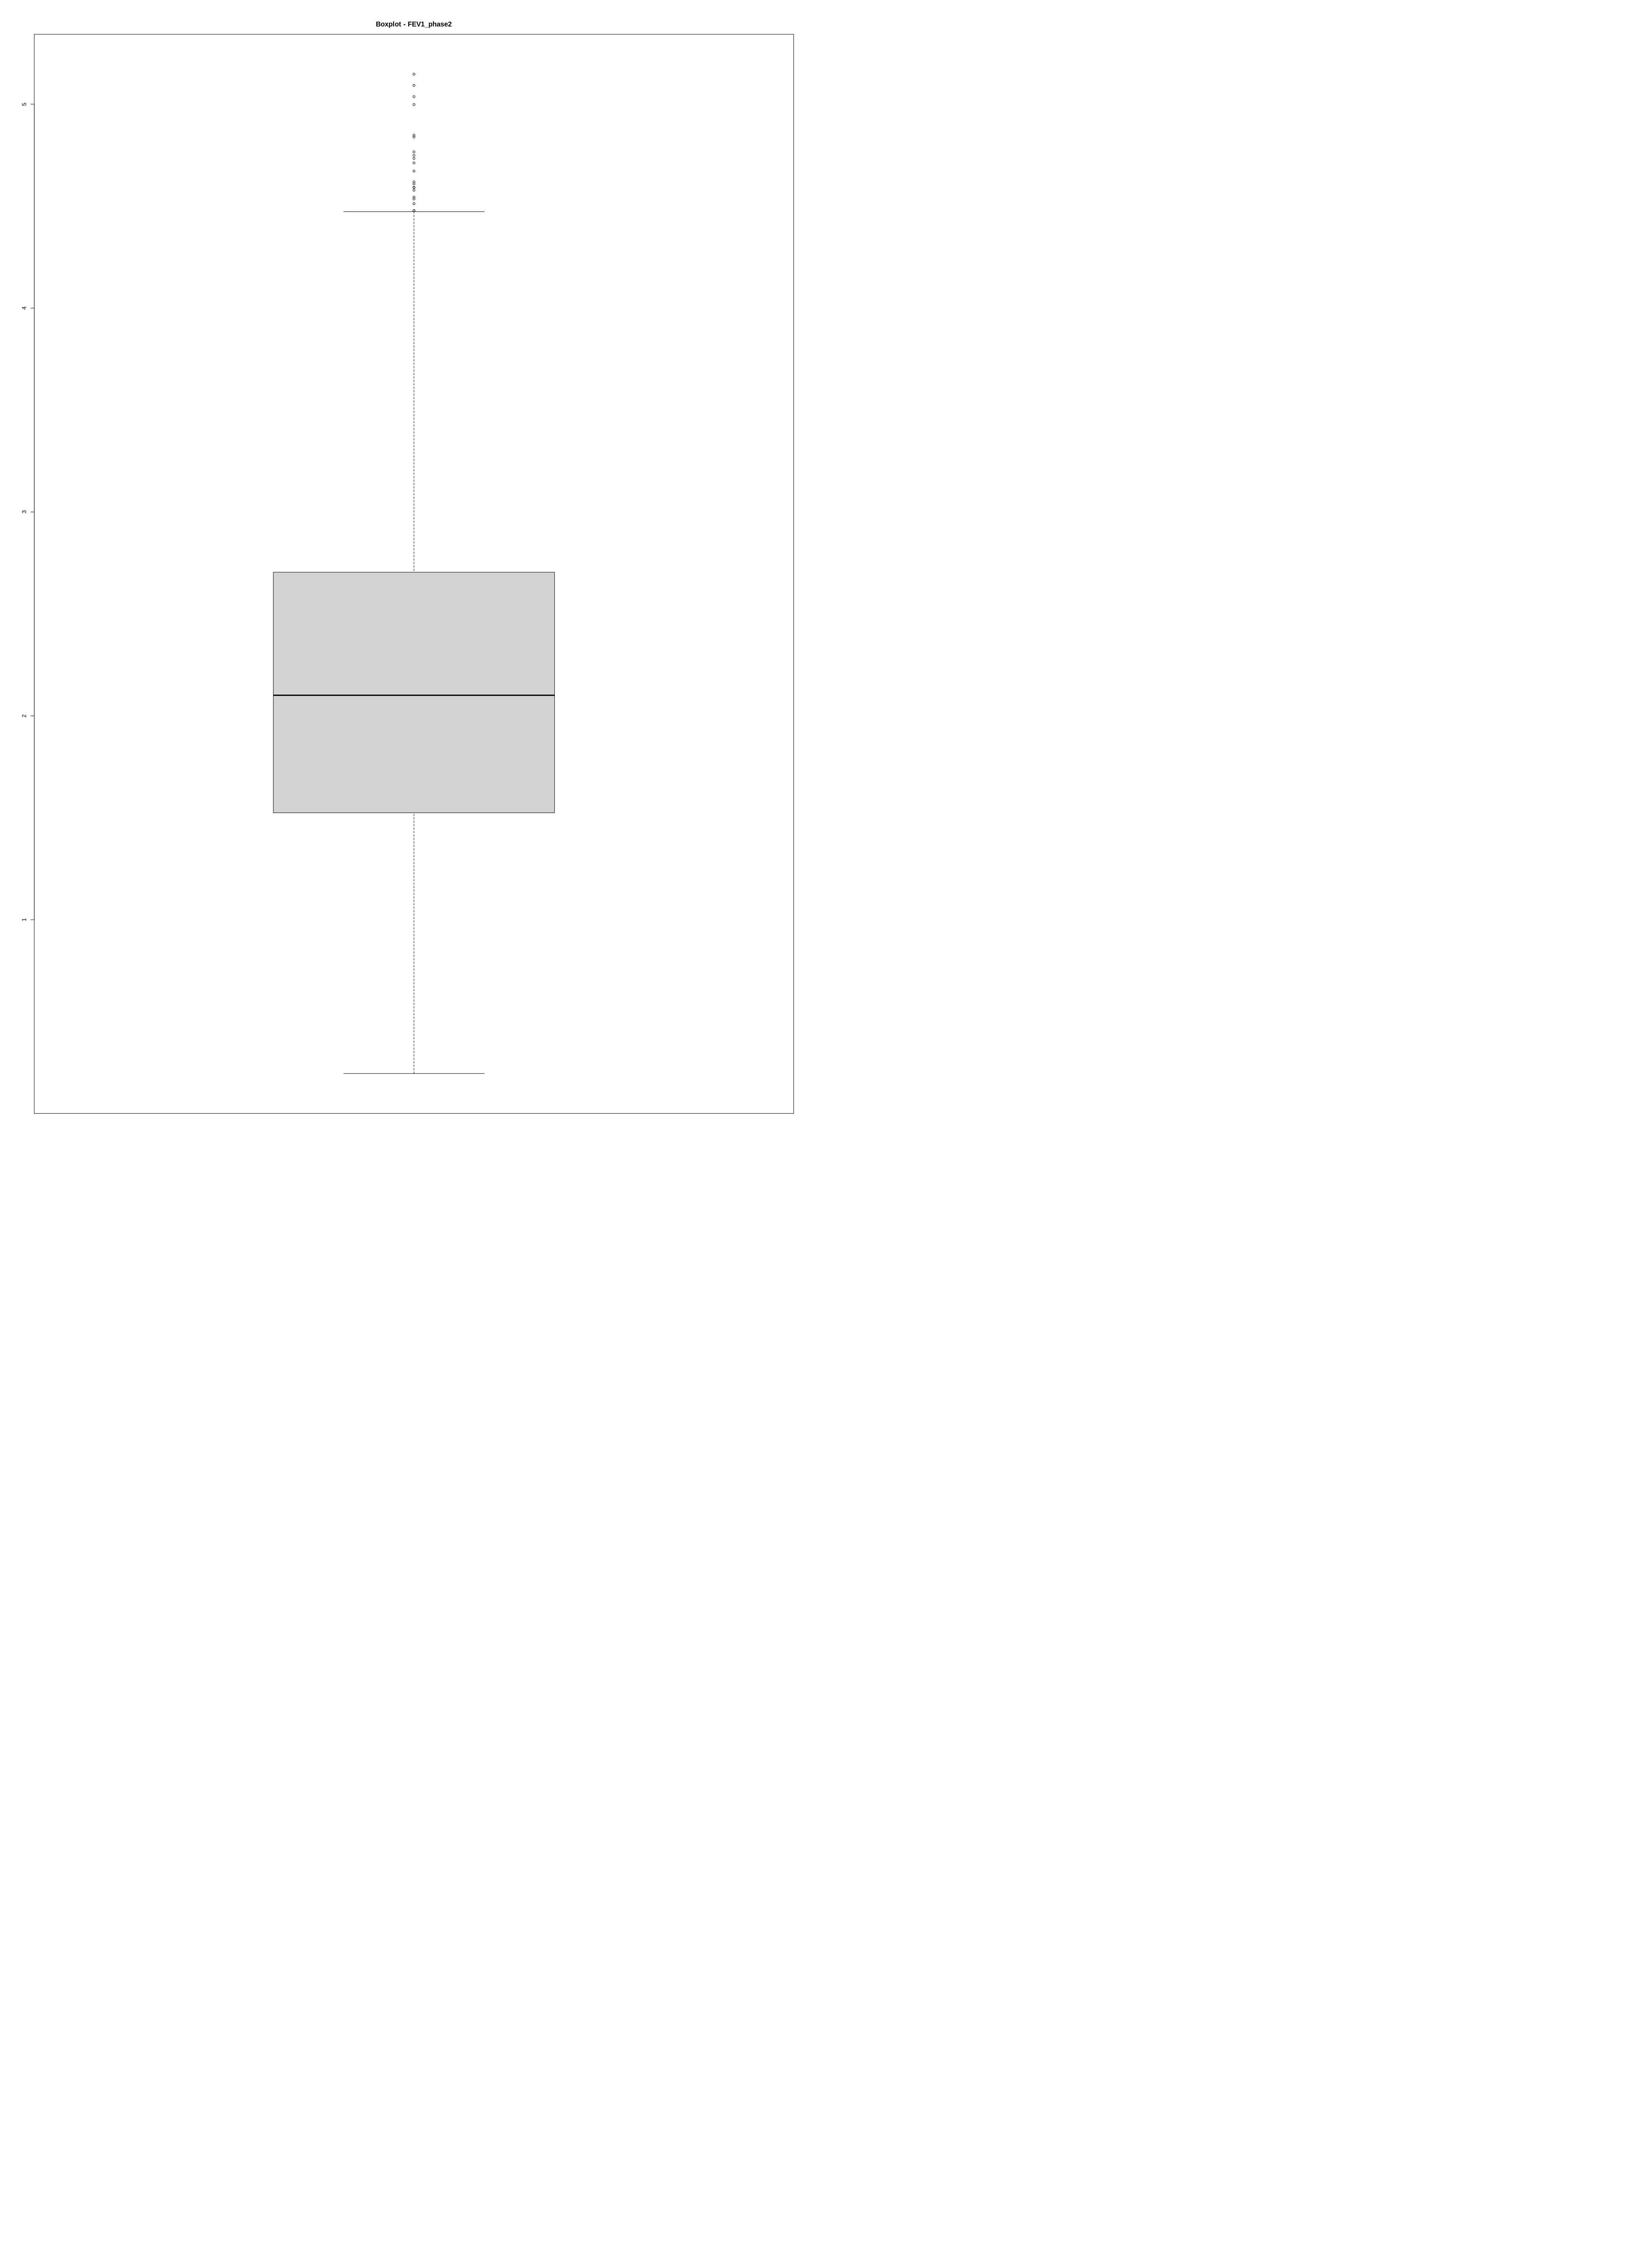

In [ ]:
# Adjust the plotting parameters to have larger individual plots
par(mfrow = c(2, 2),  # Change this to how many plots you want per page
    mar = c(3, 3, 3, 4),  # Change margin sizes if necessary
    oma = c(2, 2, 2, 3))

# Loop through a subset of variables to plot them larger
for (variable in names(copd)[1:9]) {  # Adjust the index to select variables
    if (is.numeric(copd[[variable]])) {
        boxplot(copd[[variable]], main = paste("Boxplot -", variable))
    } else if (is.factor(copd[[variable]]) || is.character(copd[[variable]])) {
        barplot(table(copd[[variable]]), main = paste("Bar Plot -", variable), xlab = variable)
    }
}

# Repeat with other subsets of variables as needed
for (variable in names(copd)[9:21]) {  # Adjust the index to select variables
    if (is.numeric(copd[[variable]])) {
        boxplot(copd[[variable]], main = paste("Boxplot -", variable))
    } else if (is.factor(copd[[variable]]) || is.character(copd[[variable]])) {
        barplot(table(copd[[variable]]), main = paste("Bar Plot -", variable), xlab = variable)
    }
}
# Repeat with other subsets of variables as needed
for (variable in names(copd)[21:36]) {  # Adjust the index to select variables
    if (is.numeric(copd[[variable]])) {
        boxplot(copd[[variable]], main = paste("Boxplot -", variable))
    } else if (is.factor(copd[[variable]]) || is.character(copd[[variable]])) {
        barplot(table(copd[[variable]]), main = paste("Bar Plot -", variable), xlab = variable)
    }
}

In [ ]:
# Set your thresholds
frequency_threshold <- 0.05  # For categorical variables
z_score_threshold <- 3       # For numerical variables

# Lists to hold potential outliers
outliers_list <- list()
categorical_outliers <- list()

for (variable in names(copd)) {
    # For numeric variables, use Z-scores
    if (is.numeric(copd[[variable]])) {
        z_scores <- scale(copd[[variable]], center = TRUE, scale = TRUE)
        outliers <- which(abs(z_scores) > z_score_threshold, arr.ind = TRUE)
        outliers_list[[variable]] <- copd[outliers, variable]
    }
    # For categorical variables, use frequency threshold
    else if (is.factor(copd[[variable]]) || is.character(copd[[variable]])) {
        frequency_table <- table(copd[[variable]])
        total_count <- sum(frequency_table)
        low_frequency_levels <- frequency_table[frequency_table/total_count < frequency_threshold]

        if(length(low_frequency_levels) > 0) {
            categorical_outliers[[variable]] <- names(low_frequency_levels)
        }
    }
}

# Combine the lists if needed or keep them separate for analysis
combined_outliers <- list(numerical = outliers_list, categorical = categorical_outliers)

# Check the combined list for outliers
combined_outliers


$numerical
$numerical$visit_year
integer(0)

$numerical$visit_age
numeric(0)

$numerical$height_cm
 [1] 200.7 133.7 140.0 208.3 200.3 136.5 141.2 159.9 159.9 159.9 159.9 159.9
[13] 159.9 159.9

$numerical$weight_kg
 [1] 176.4 142.9 149.0 162.8 153.6 164.0 157.3 150.0 150.0 144.0 149.0 176.4
[13] 142.9 161.0 154.0 156.0 150.0 148.0 158.8 144.0 152.0 160.7 159.0 153.0
[25] 145.0 144.6 159.0 162.0 166.8 151.0 153.0 143.0 143.0 147.9 155.0 147.4
[37] 146.4 145.0 149.5 146.1 159.0 147.2 144.5 146.4 151.0  73.0  73.0  73.0
[49]  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0
[61]  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0
[73]  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0  73.0
[85]  73.0  73.0  73.0  73.0  73.0  73.0

$numerical$sysBP
 [1] 179 188 197 196 180 189 194 179 180 180 188 194 191 186 181 180 180 194 180
[20] 205 211 180 187 180 191 182 182 179 179 180 184 130 130 130 130 130 130 130
[39] 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
[58] 130 130 130 130 130

$numerical$diasBP
 [1]  42  43  42  40  34 120 120 114 114 110 113  43 116 110 110 118  41 118  42
[20]  42 112 113  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80
[39]  80  80  80  80  80  80

$numerical$hr
 [1] 121 116 115 112 115 117 113 117 117 119 113 115 120 111 111 131 113 113  87
[20]  87  87  87  87  87  87  87  87  87  87  87  87  87  87  87  87  87

$numerical$O2_hours_day
  [1] 24 24 24 24 24 24 24 24 15 24 24 24 20 24 24 22 24 16 16 14 24 24 24 18 24
 [26] 18 15 24 24 24 24 20 24 24 24 24 24 24 24 24 24 24 24 24 24 24 20 24 14 24
 [51] 24 24 17 24 15 24 24 15 24 24 24 17 14 16 24 24 14 20 24 22 24 22 18 24 23
 [76] 24 24 24 20 16 24 24 24 24 23 24 24 24 24 24 18 24 24 22 16 24 24 18 24 20
[101] 24 24 24 24 18 24 14 16 24 18 24 24 24 24 24 24 22 24 24 24 24 24 23 24 24
[126] 24 24 22 24 24 24 24 16 24 20 24 24 24 24 24 24 24 18 24 24 24 24 24 24 24
[151] 16 24 24 24 22 24 24 14 24 24 15 24 20 24 24 24 24 24 18 24 24 24 24 15 24
[176]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[201]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[226]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[251]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[276]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[301]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[326]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

$numerical$bmi
  [1] 54.36 48.35 48.44 52.94 47.76 48.54 56.01 53.75 51.38 50.92 51.42 49.88
 [13] 48.83 52.53 53.37 51.66 50.55 47.75 53.81 49.48 55.18 48.01 48.48 51.06
 [25] 50.87 50.32 50.48 47.71 53.00 52.68 57.97 64.10 48.29 49.05 47.78 50.91
 [37] 48.40 49.48 50.67 60.00 55.98 48.02 48.28 47.96 49.30 49.85 49.21 48.91
 [49] 54.77 52.96 47.57 53.08 52.13 47.64 50.66 55.40 49.89 48.70 28.55 28.55
 [61] 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55
 [73] 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55
 [85] 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55
 [97] 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55
[109] 28.55 28.55 28.55 28.55 28.55 28.55 28.55 28.55

$numerical$SmokStartAge
  [1] 35 36 34 40 48 50 33 45 42 40 33 31 41 33 34 39 35 32 32 34 35 36 43 43 35
 [26] 35 32 45 32 40 35 40 35 35 33 31 31 36 32 31 36 35 32 35 31 34 35 44 36 32
 [51] 32 36 38 40 42 40 50 40 35 33 32 32 32 36 35 35 31 37 48 50 40 35 37 32 38
 [76] 31 38 37 31 32 35 35 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
[101] 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
[126] 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
[151] 14 14 14 14 14 14 14 14 14 14 14 14 14 14

$numerical$CigPerDaySmokAvg
  [1] 60 60 70 60 80 

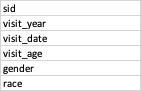
The above demographic variables doesn't influenece the regression in my opinion.

Missing at Random (MAR)

In [ ]:
# Assuming 'imputed_data' is your mice object
summary(imputed_data)

Class: mids
Number of multiple imputations:  5 
Imputation methods:
                         sid                   visit_year 
                          ""                           "" 
                  visit_date                    visit_age 
                          ""                           "" 
                      gender                         race 
                          ""                           "" 
                   height_cm                    weight_kg 
                          ""                           "" 
                       sysBP                       diasBP 
                       "pmm"                        "pmm" 
                          hr                 O2_hours_day 
                       "pmm"                           "" 
                         bmi                       asthma 
                          ""                        "pmm" 
                   hay_fever            bronchitis_attack 
                          ""                   

In [ ]:
# Assuming 'imputed_data' is your mids object
imputed_data$loggedEvents


it im dep                          meth    
1   0  0                               constant
2   0  0                               constant
3   0  0                               constant
4   1  1  sysBP                        pmm     
5   1  1  diasBP                       pmm     
6   1  1  hr                           pmm     
7   1  1  asthma                       pmm     
8   1  1  bronchitis_attack            pmm     
9   1  1  pneumonia                    pmm     
10  1  1  chronic_bronchitis           pmm     
11  1  1  emphysema                    pmm     
12  1  1  copd                         pmm     
13  1  1  sleep_apnea                  pmm     
14  1  1  SmokStartAge                 pmm     
15  1  1  CigPerDaySmokAvg             pmm     
16  1  1  Duration_Smoking             pmm     
17  1  1  total_lung_capacity          pmm     
18  1  1  pct_emphysema                pmm     
19  1  1  functional_residual_capacity pmm     
20  1  1  pct_gastrapping              pmm     
21  1  1  insp_meanatt                 pmm     
22  1  1  exp_meanatt                  pmm     
23  1  1  FEV1_FVC_ratio               pmm     
24  1  1  FEV1                         pmm     
25  1  1  FVC                          pmm     
26  1  2  sysBP                        pmm     
27  1  2  diasBP                       pmm     
28  1  2  hr                           pmm     
29  1  2  asthma                       pmm     
30  1  2  bronchitis_attack            pmm     
⋮   ⋮  ⋮  ⋮                            ⋮       
524 5  4  pct_emphysema                pmm     
525 5  4  functional_residual_capacity pmm     
526 5  4  pct_gastrapping              pmm     
527 5  4  insp_meanatt                 pmm     
528 5  4  exp_meanatt                  pmm     
529 5  4  FEV1_FVC_ratio               pmm     
530 5  4  FEV1                         pmm     
531 5  4  FVC                          pmm     
532 5  5  sysBP                        pmm     
533 5  5  diasBP                       pmm     
534 5  5  hr                           pmm     
535 5  5  asthma                       pmm     
536 5  5  bronchitis_attack            pmm     
537 5  5  pneumonia                    pmm     
538 5  5  chronic_bronchitis           pmm     
539 5  5  emphysema                    pmm     
540 5  5  copd                         pmm     
541 5  5  sleep_apnea                  pmm     
542 5  5  SmokStartAge                 pmm     
543 5  5  CigPerDaySmokAvg             pmm     
544 5  5  Duration_Smoking             pmm     
545 5  5  total_lung_capacity          pmm     
546 5  5  pct_emphysema                pmm     
547 5  5  functional_residual_capacity pmm     
548 5  5  pct_gastrapping              pmm     
549 5  5  insp_meanatt                 pmm     
550 5  5  exp_meanatt                  pmm     
551 5  5  FEV1_FVC_ratio               pmm     
552 5  5  FEV1                         pmm     
553 5  5  FVC                          pmm     
    out                                                                                                                                                                
1   sid                                                                                                                                                                
2   visit_date                                                                                                                                                         
3   hay_fever                                                                                                                                                          
4   asthmaUnknown, bronchitis_attackUnknown, pneumoniaUnknown, chronic_bronchitisUnknown, emphysemaUnknown, copdUnknown, sleep_apneaUnknown                            
5   asthmaUnknown, bronchitis_attackUnknown, pneumoniaUnknown, chronic_bronchitisUnknown, emphysemaUnknown, copdUnknown, sleep_apneaUnknown                            
6   asthmaUnknown, b

The log shows that for each of the listed variables (sid, visit_date, gender, etc.), the imputation method was listed as constant. This typically means that these variables had no missing values, and therefore no imputation was necessary, or they were not used in the imputation model for some other reason (e.g., they might be identifiers or other non-informative variables).

From the above heat correlation plot, I can infer that pct_emphysema is highly correlated to pct_gastrapping,insp_meanatt, exp_meanatt, FEV1_FVC_ratio.

# Visualiztion of all independent variables

# The variables that I would like to consider for my regression are
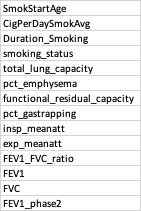
emphysema

hay_fever
copd

# The new dataset is copd1. The variables that I would like to consider for my regression

In [ ]:
library(leaps)

# Remove rows with any missing values from the dataset
copd_clean <- na.omit(copd)

# Ensure that all predictors are numeric and not factors
copd_clean <- copd_clean[sapply(copd_clean, is.numeric)]

# Detect and remove highly correlated predictors
cor_matrix <- cor(copd_clean)
high_cor <- findCorrelation(cor_matrix, cutoff = 0.9) # Adjust cutoff as necessary
copd_clean <- copd_clean[-high_cor]

# Run best subsets regression without the rows containing NA
# Ensure nvmax is not larger than the number of predictors available after removing linear dependencies
nvmax_value <- min(ncol(copd_clean) - 1, 20) # Subtracting 1 to account for the response variable

best_subsets <- regsubsets(pct_emphysema ~ ., data = copd_clean, nbest = 1, nvmax = nvmax_value,
                           really.big = TRUE, intercept = FALSE)

# Plot the result
plot(best_subsets, scale = "bic")


ERROR: ignored

In [ ]:


# Assuming you have already run the regsubsets function and stored the result in best_subsets
best_subsets <- regsubsets(pct_emphysema ~ ., data = copd, nvmax = 10, nbest = 1, really.big = TRUE)


# Summary of the best subsets
best_subsets_summary <- summary(best_subsets)

# Find the model with the lowest BIC
best_model_index <- which.min(best_subsets_summary$bic)

# Get the names of the predictors included in the best model
best_variables <- names(which(best_subsets_summary$which[best_model_index,]))

# Print the best variables
print(best_variables)


In [ ]:
# Omit NA values from the dataset
copd_clean <- na.omit(copd)

# Ensure response variable is set after removing NAs
response <- copd_clean$pct_emphysema

# Create model matrix for "full" regression model
preds <- model.matrix(pct_emphysema ~ . , data = copd_clean[, -1])

# Run best subsets selection
best_subsets <- regsubsets(preds, y = response,
                           nbest = 100,        # Save the best "nbest" for each number of variables
                           nvmax = 20,         # Maximum number of variables allowed in the model
                           really.big = TRUE,  # For larger datasets
                           intercept = FALSE)

# Plot the result
options(repr.plot.width=20, repr.plot.height=10)
plot(best_subsets, scale = "bic")


In [ ]:
dim(copd)
length(response)
dim(preds)
dim(na.omit(copd))

In [ ]:
# Assuming 'copd' is your original dataframe and you have all these variables in it.

# Select the variables you want to include in your new dataframe
copd1 <- copd[, c(
  "SmokStartAge",
  "CigPerDaySmokAvg",
  "Duration_Smoking",
  "smoking_status",
  "emphysema",
  "hay_fever",
  "copd",
  "total_lung_capacity",
  "pct_emphysema",
  "functional_residual_capacity",
  "pct_gastrapping",
  "insp_meanatt",
  "exp_meanatt",
  "FEV1_FVC_ratio",
  "FEV1",
  "FVC",
  "FEV1_phase2",
  "bmi",
  "weight_kg"
)]

# Check the first few rows of the new dataframe to ensure it looks correct
head(copd1)


In [ ]:
options(repr.plot.width=20, repr.plot.height=10)

response     <- cop1$pct_emphysema
# create model matrix for "full" regression model
preds        <- model.matrix(pct_emphysema ~ . , data = copd1[, -1])
# run best subsets selection
best_subsets <-  regsubsets(preds, y = response,
                    nbest  a= 100,    # save the best "nbest" for each number of variables
                    nvmax = 20,    # maximum number of variables allowed in the model
                    really.big=T, # for larger datasets
                    intercept = FALSE)

plot(best_subsets, scale = "bic")

In [ ]:
#copd1 dataframe
pairs(~pct_emphysema + SmokStartAge + CigPerDaySmokAvg + Duration_Smoking + smoking_status + emphysema + hay_fever + copd + total_lung_capacity + functional_residual_capacity + pct_gastrapping + insp_meanatt + exp_meanatt + FEV1_FVC_ratio + FEV1 + FVC + FEV1_phase2 + bmi + weight_kg, data = copd1)


# Best subset selection

In [ ]:
regfit.full <- regsubsets(pct_emphysema ~ ., data=copd1, nvmax=ncol(copd1)-1)
plot(regfit.full, scale="bic")


Below are the variables I will select for the regression analysis:
1. hay_fever

2.insp_meanatt

3. exp_meanatt

4. FEV1_FVC_ratio

5. FEV1

6. FVC

7. FEV1_phase2

8. weight_kg

9. copd

10. emphysema

In [ ]:
print(names(copd1))

In [ ]:
copd1$hay_fever <- factor(copd$hay_fever)
 levels(copd1$hay_fever)=c("No","Yes", "Unknown")
copd1$emphysema <- factor(copd$emphysema, levels = c("Yes", "No", "Unknown"))
copd1$copd <- factor(copd$copd, levels = c("Yes", "No", "Unknown"))

# Creating Pair plots for the selected variables for the regression

In [ ]:
# create pairs plots with life expectancy
for (i in c(2:5, 7:ncol(copd1))) {
  print(ggpairs(copd1[,c(i, 9)]))
}

1. HAY_FEVER

In [ ]:
library(ggplot2)

# Set plot dimensions (this might be different if you're not using Jupyter notebooks)
options(repr.plot.width=15, repr.plot.height=10)

# Order regions by median life expectancy
# First, calculate the median of pct_emphysema within each hay_fever group
sorted_region <- names(sort(tapply(copd1$pct_emphysema, copd1$hay_fever, median), decreasing = TRUE))

# Then, factor the hay_fever variable according to the sorted order
copd1$sorted_hay_fever <- factor(copd1$hay_fever, levels = sorted_region)

# Plot pct_emphysema vs ordered hay_fever as a boxplot
ggplot(data = copd1, aes(x = sorted_hay_fever, y = pct_emphysema)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 15),
        axis.text.y = element_text(hjust = 1, size = 15))


COPD

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = copd1, aes(copd, pct_emphysema)) +
  geom_boxplot()

emphysema

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = copd1, aes(emphysema, pct_emphysema)) +
  geom_boxplot()

Smoke_Smart_Age

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = copd1, aes(SmokStartAge, pct_emphysema)) +
  geom_point() + geom_smooth()

Log Transformation

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)

# Scatter plot of 'pct_emphysema' against 'SmokStartAge' with a polynomial regression line
ggplot(data = copd1, aes(x = SmokStartAge, y = pct_emphysema)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", formula = y ~ poly(x, 3), se = FALSE)  # Add a polynomial regression line


total_lung_capacity

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = copd1, aes((total_lung_capacity), pct_emphysema)) +
  geom_point() + geom_smooth()

logarithmic transformation

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = copd1, aes(log(total_lung_capacity), pct_emphysema)) +
  geom_point() + geom_smooth()

functional_residual_capacity

In [ ]:

options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = copd1, aes(log(functional_residual_capacity), pct_emphysema)) +
  geom_point() + geom_smooth()

insp_meanatt

In [ ]:


options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = copd1, aes(insp_meanatt, pct_emphysema)) +
  geom_point() + geom_smooth()

exp_meanatt

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = copd1, aes(exp_meanatt, pct_emphysema)) +
  geom_point() + geom_smooth()

FEV1_FVC_ratio

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = copd1, aes(log(FEV1_FVC_ratio), pct_emphysema)) +
  geom_point() + geom_smooth()

FEV1_phase2

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = copd1, aes((FEV1_phase2), pct_emphysema)) +
  geom_point() + geom_smooth()

<br>

---

<br>

<br>